In [2]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

InteractiveShell.ast_node_interactivity = "all"
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline
sns.set(style="whitegrid", font_scale=2)

plt.rc("font", **{"family": "serif", "serif": ["Palatino"]})
#plt.rc("text", usetex = True)

plt.rcParams["figure.figsize"] = (24, 18)

In [3]:
dtypes = {
    "ID": "int64",
    "Case Number": "object",
    "Date": "object",
    "Block": "object",
    "IUCR": "object",
    "Primary Type": "object",
    "Description": "object",
    "Location Description": "object",
    "Arrest": "bool",
    "Domestic": "bool",
    "Beat": "int64",
    "District": "float64",
    "Ward": "float64",
    "Community Area": "float64",
    "FBI Code": "object",
    "X Coordinate": "float64",
    "Y Coordinate": "float64",
    "Year": "int64",
    "Updated On": "object",
    "Latitude": "float64",
    "Longitude": "float64",
    "Location": "object"
}

df = pd.read_csv("Crimes_-_2001_to_present.csv",
                 parse_dates=["Date", "Updated On"], dtype=dtypes)

FileNotFoundError: [Errno 2] File Crimes_-_2001_to_present.csv does not exist: 'Crimes_-_2001_to_present.csv'

In [3]:
# 1 - data cleansing

# i decided to leave the data mostly intact, not trying to fill NaN values as it might skew the data.
# the only thing i changed is merging two "CRIMINAL SEXUAL ASSAULT" in Primary Type into one,
# since one is "CRIMINAL SEXUAL ASSAULT", the other is "CRIM SEXUAL ASSAULT"

df = df.replace("CRIM SEXUAL ASSAULT", "CRIMINAL SEXUAL ASSAULT")

# for example, we only need the crime type and the date columns for the second key point,
# so i extract those columns and assign it to a new variable.

In [4]:
display(df.columns.values)
df.head()

array(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic',
       'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'], dtype=object)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,2001-01-01 11:00:00,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,2017-08-05 15:50:08,NaN,NaN,NaN
1,11227287,JB147188,2017-10-08 03:00:00,092XX S RACINE AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,2018-02-11 15:57:41,NaN,NaN,NaN
2,11227583,JB147595,2017-03-28 14:00:00,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,2018-02-11 15:57:41,NaN,NaN,NaN
3,11227293,JB147230,2017-09-09 20:17:00,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,2018-02-11 15:57:41,NaN,NaN,NaN
4,11227634,JB147599,2017-08-26 10:00:00,001XX W RANDOLPH ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,2018-02-11 15:57:41,NaN,NaN,NaN


In [5]:
# 2 - crimes and date/time

crime_date = df[["Primary Type", "Date"]]

# crime_date.set_index("Date", inplace=True) # set date as index
# crime_date.index = crime_date["Date"]
# crimes_2019 = crime_date.loc["2019"]
# OR crimes_2019 = crime_date.loc[crime_date["Date"].dt.year == 2019]

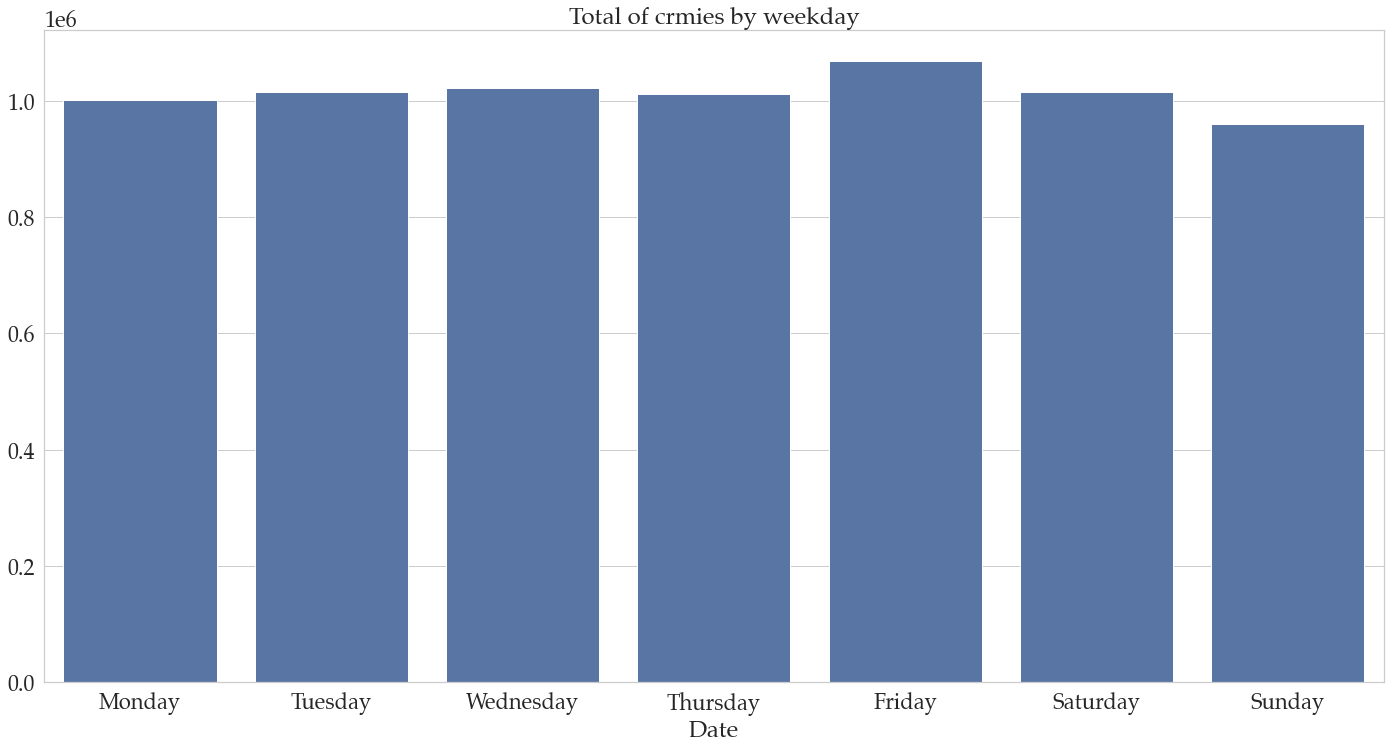

In [40]:
# total of crimes by weekday

days = ["Monday", "Tuesday", "Wednesday",
        "Thursday", "Friday", "Saturday", "Sunday"]
all_crimes_by_days = crime_date.groupby(
    crime_date["Date"].dt.day_name()).size().reindex(days)

plt.figure(figsize=(24, 12))
ax = sns.barplot(x=all_crimes_by_days.index, y=all_crimes_by_days, color="b")
ax.set(title="Total of crmies by weekday")

plt.show()

# friday has the most and sunday has the least number of crimes,
# but on average it is nearly the same as every other weekday (around 1e6)

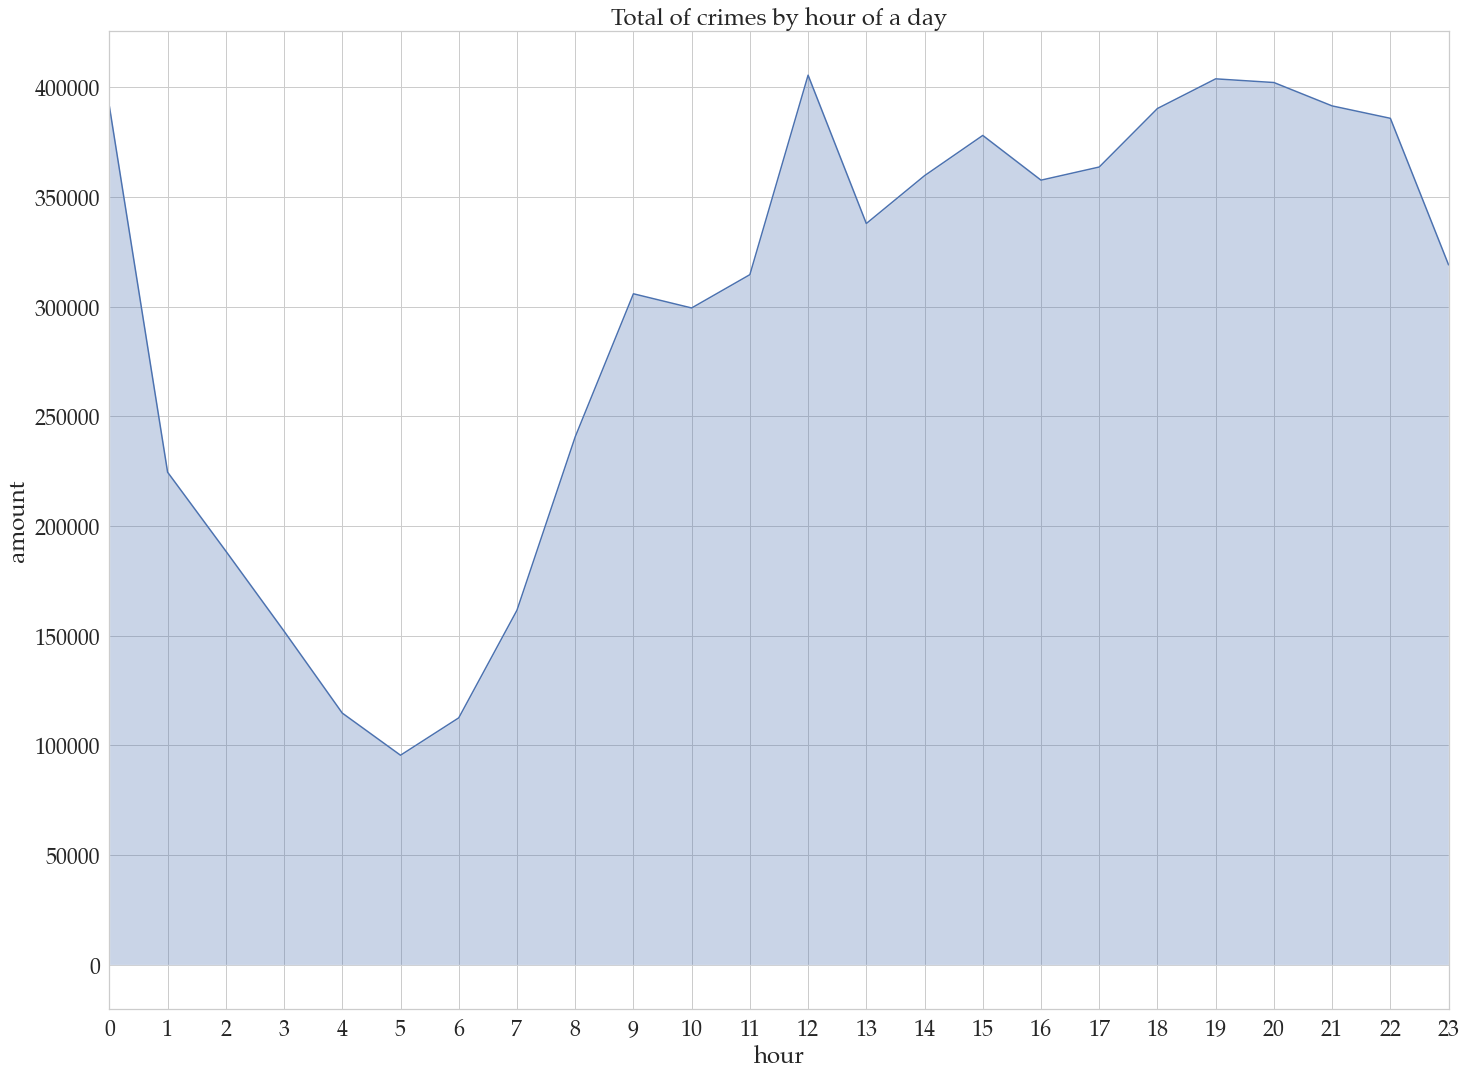

In [41]:
# total of crimes by hour of a day

all_crimes_by_hour = crime_date.groupby(df["Date"].dt.hour).size()

f, ax = plt.subplots()
ax.fill_between(all_crimes_by_hour.index, 0, all_crimes_by_hour, alpha=0.3)
ax.plot(all_crimes_by_hour)
#ax = sns.lineplot(data=all_crimes_by_hour, label="Crimes")

ax.set(title="Total of crimes by hour of a day",
       xlim=(0, 23), xlabel="hour", ylabel="amount")
ax.set_xticks(np.arange(0, 24))
plt.show()
;

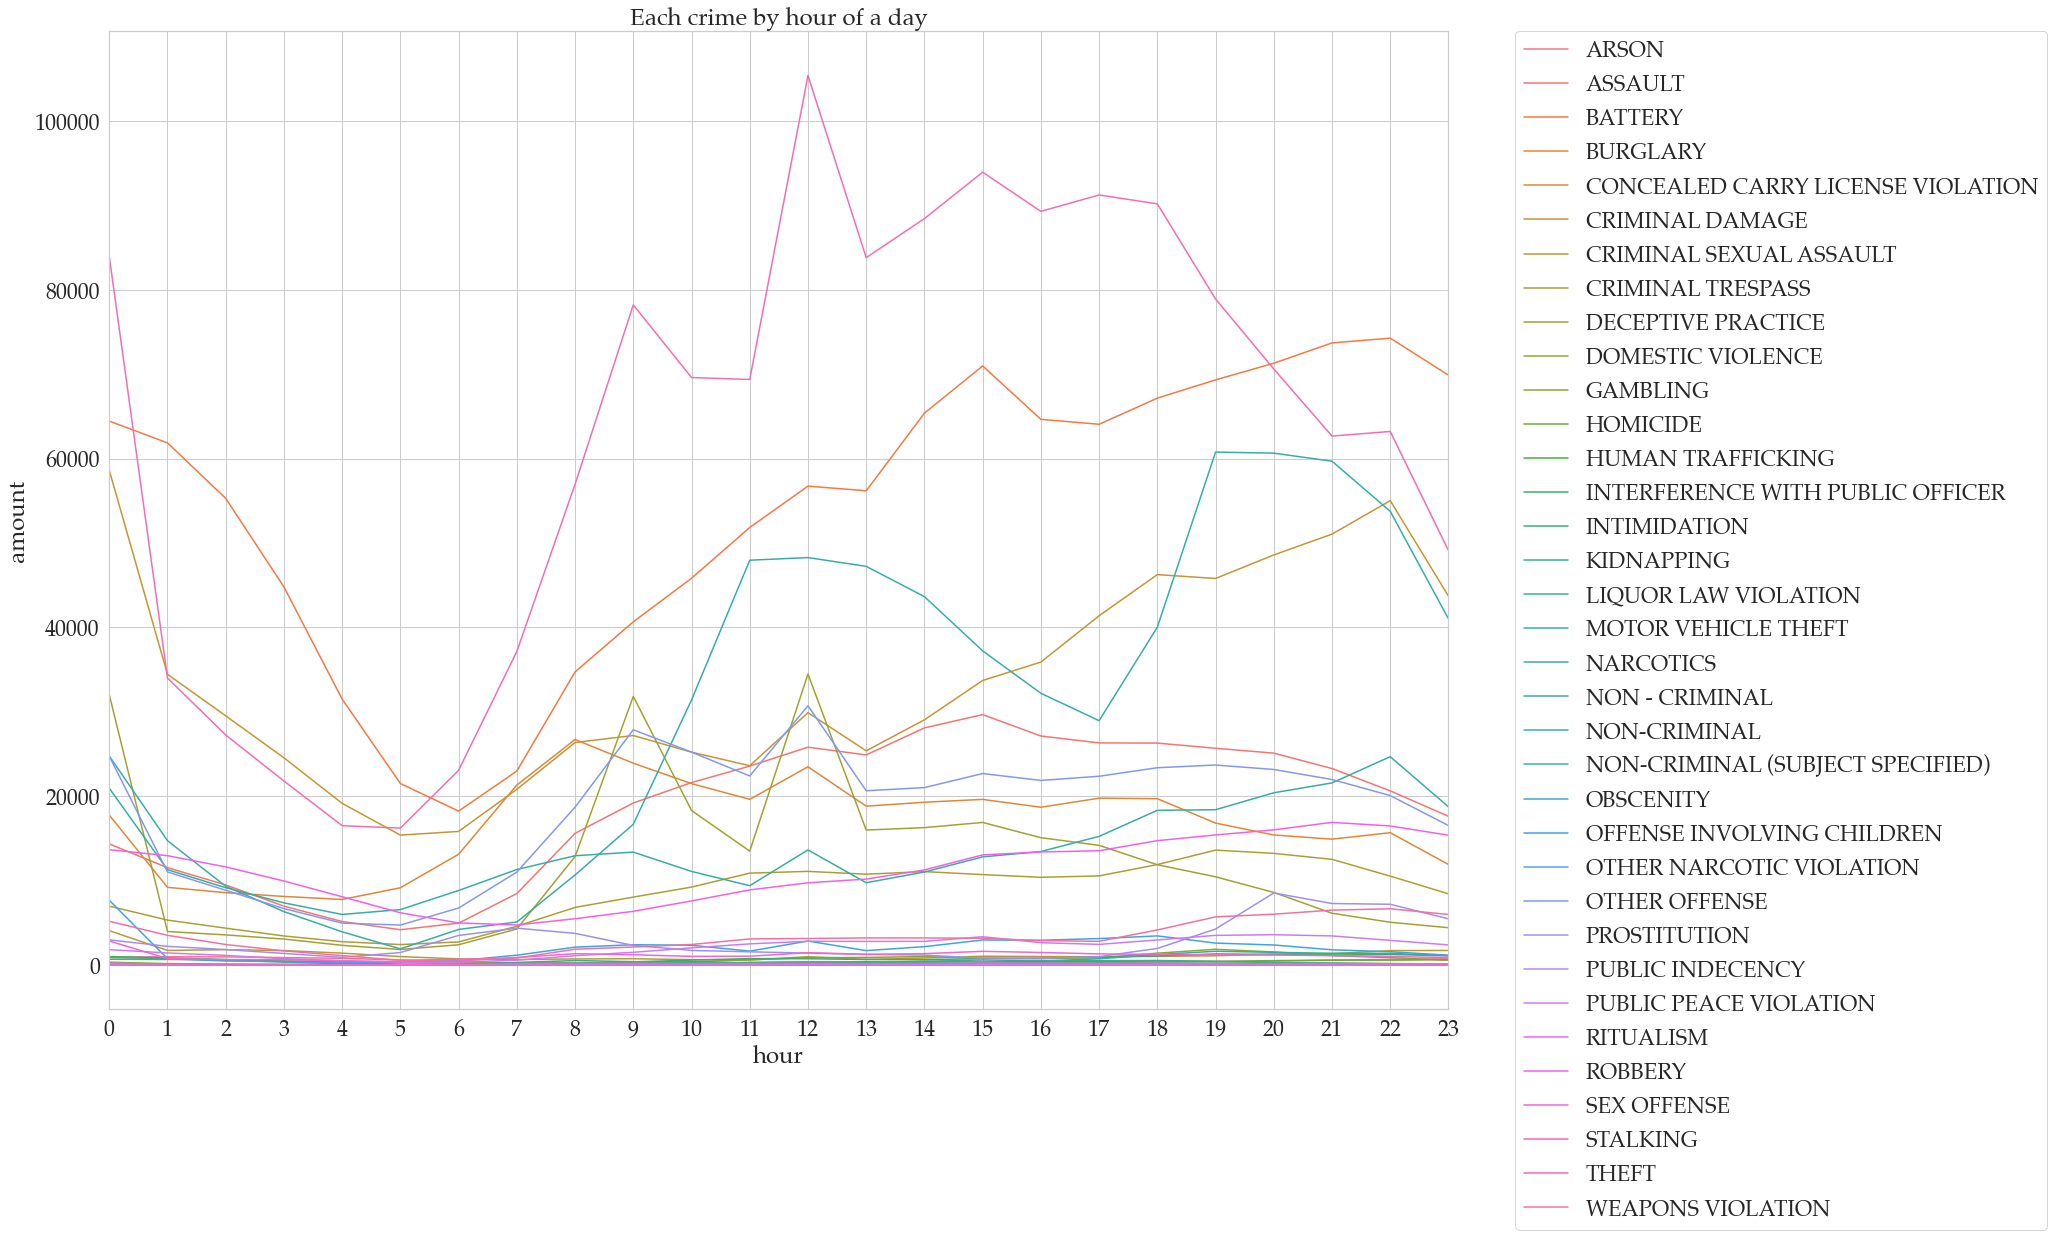

In [42]:
# each crimes by hour of a day

crime_date = df[["Primary Type", "Date"]]

crime_by_hour = crime_date.groupby(
    [df["Date"].dt.hour, "Primary Type"]).count().unstack()
crime_by_hour.columns = crime_by_hour.columns.droplevel(0)  # drop Date

plt.figure(figsize=(24, 18))
ax = sns.lineplot(data=crime_by_hour, dashes=False)
ax.set(title="Each crime by hour of a day", xlim=(
    0, 23), xlabel="hour", ylabel="amount")
ax.set_xticks(np.arange(0, 24))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

# both graph shows a global minimum at 5am and global maximum at 12pm.
# there are more crimes happen at daytime than nighttime.

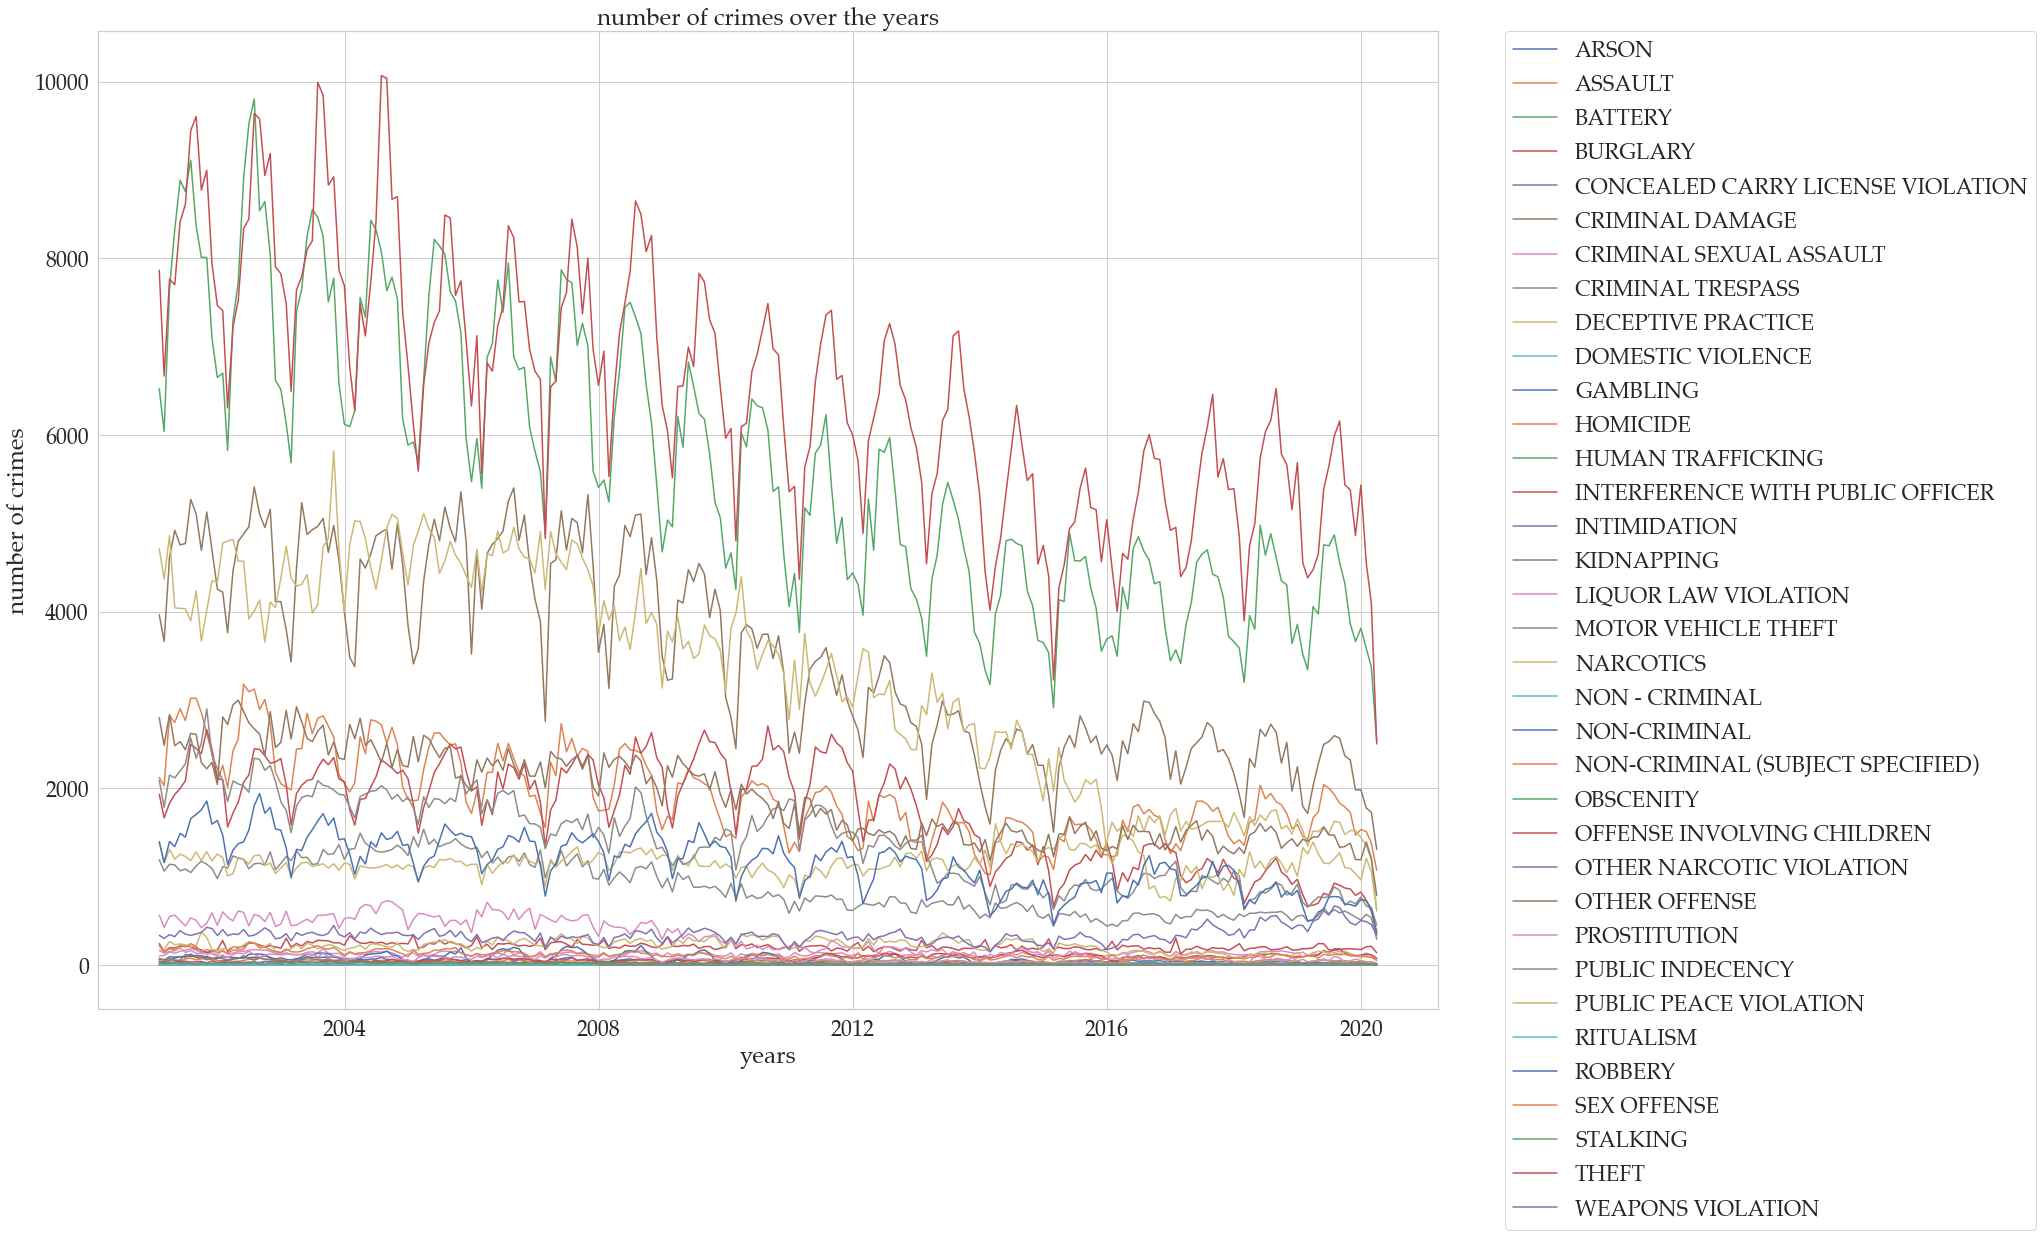

In [43]:
# 3.1 - number of all crimes represent throughout the years

crimes = df["Primary Type"].unique()  # all type of crimes
crimes.sort()

fig, ax = plt.subplots(figsize=(24, 18))

for crime in crimes:
    df_crime = crime_date.loc[crime_date["Primary Type"] == crime]
    crime_monthly = df_crime.groupby(pd.Grouper(
        key="Date", freq="M")).size()  # group by month
    # crime_from_2018 = crime_monthly.loc[crime_monthly.index >= np.datetime64("2018")] # crimes from 2018 to now
    ax.plot(crime_monthly, label=crime)
    ax.set(title="number of crimes over the years",
           xlabel="years", ylabel="number of crimes")
    ax.legend()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# number of crimes rises slowly towards the end of a year.
# it reaches its peak at the end of the year beforely sharply decreases.
# number of crimes are decreasing gradually

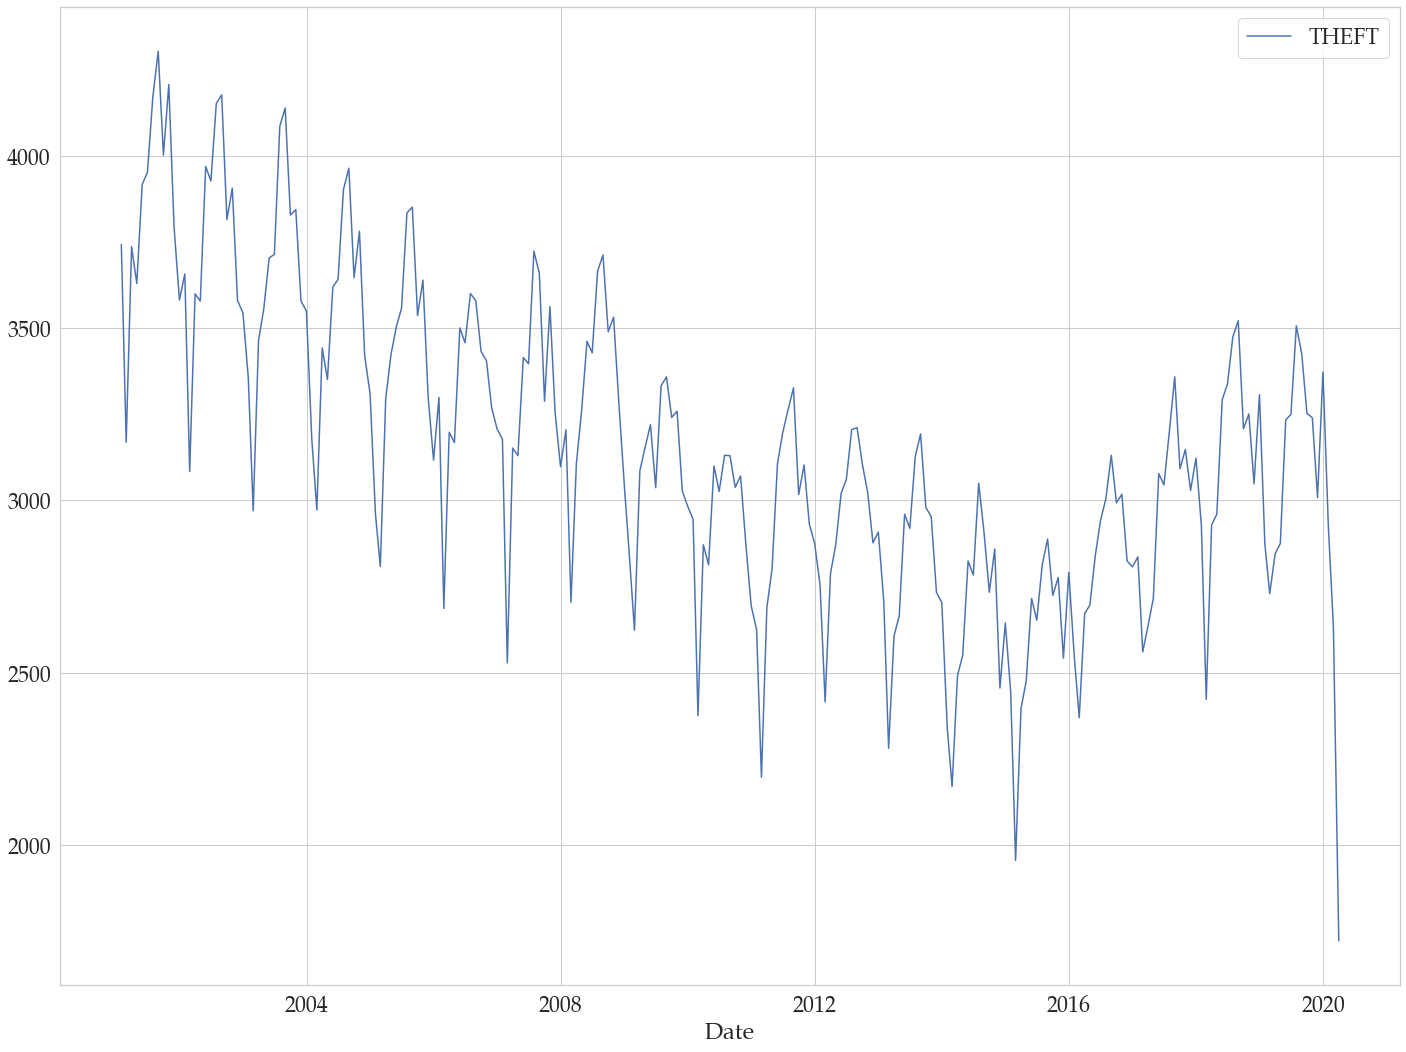

In [44]:
# calculate number of thefts over the years

crime_by_date = crime_date.groupby(
    ["Primary Type", "Date"]).size().reset_index()
theft_by_date = crime_by_date.loc[crime_by_date["Primary Type"] == "THEFT"]
#theft_by_date.set_index("Date", inplace=True)
theft_by_date = theft_by_date.groupby(pd.Grouper(
    key="Date", freq="M")).agg(THEFT=("Primary Type", "size"))

sns.lineplot(data=theft_by_date)

plt.show()
;

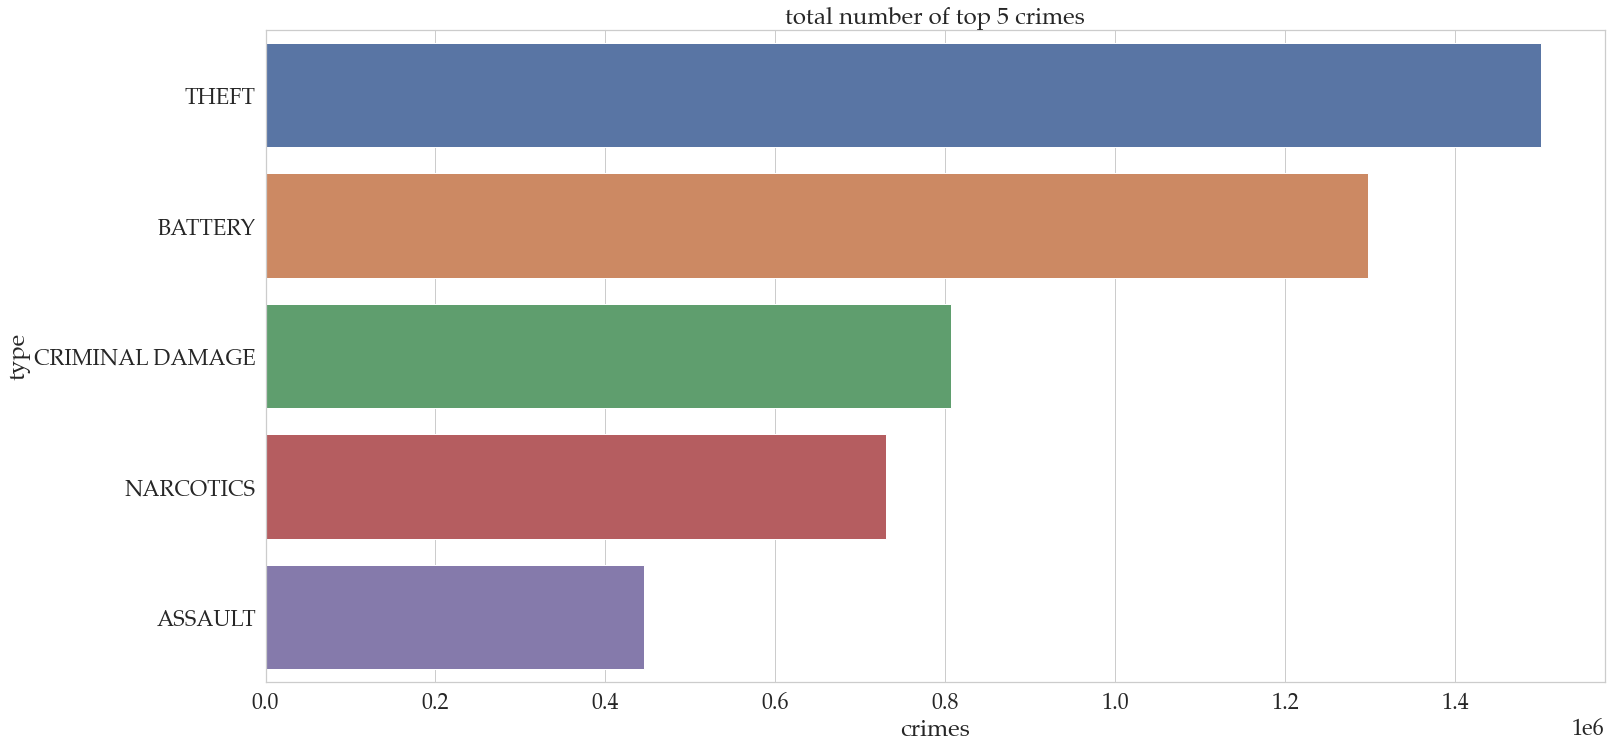

In [45]:
# 3.2 - top 5 crimes in total and throughout the years

# total number of top 5 crimes
crimes_top_five_total = df.groupby("Primary Type").size().sort_values(
    ascending=False).reset_index(name="Count").head()

fig, ax = plt.subplots(figsize=(24, 12))
sns.barplot(x="Count", y="Primary Type", data=crimes_top_five_total, ax=ax)
ax.set(title="total number of top 5 crimes", xlabel="crimes", ylabel="type")

plt.show()

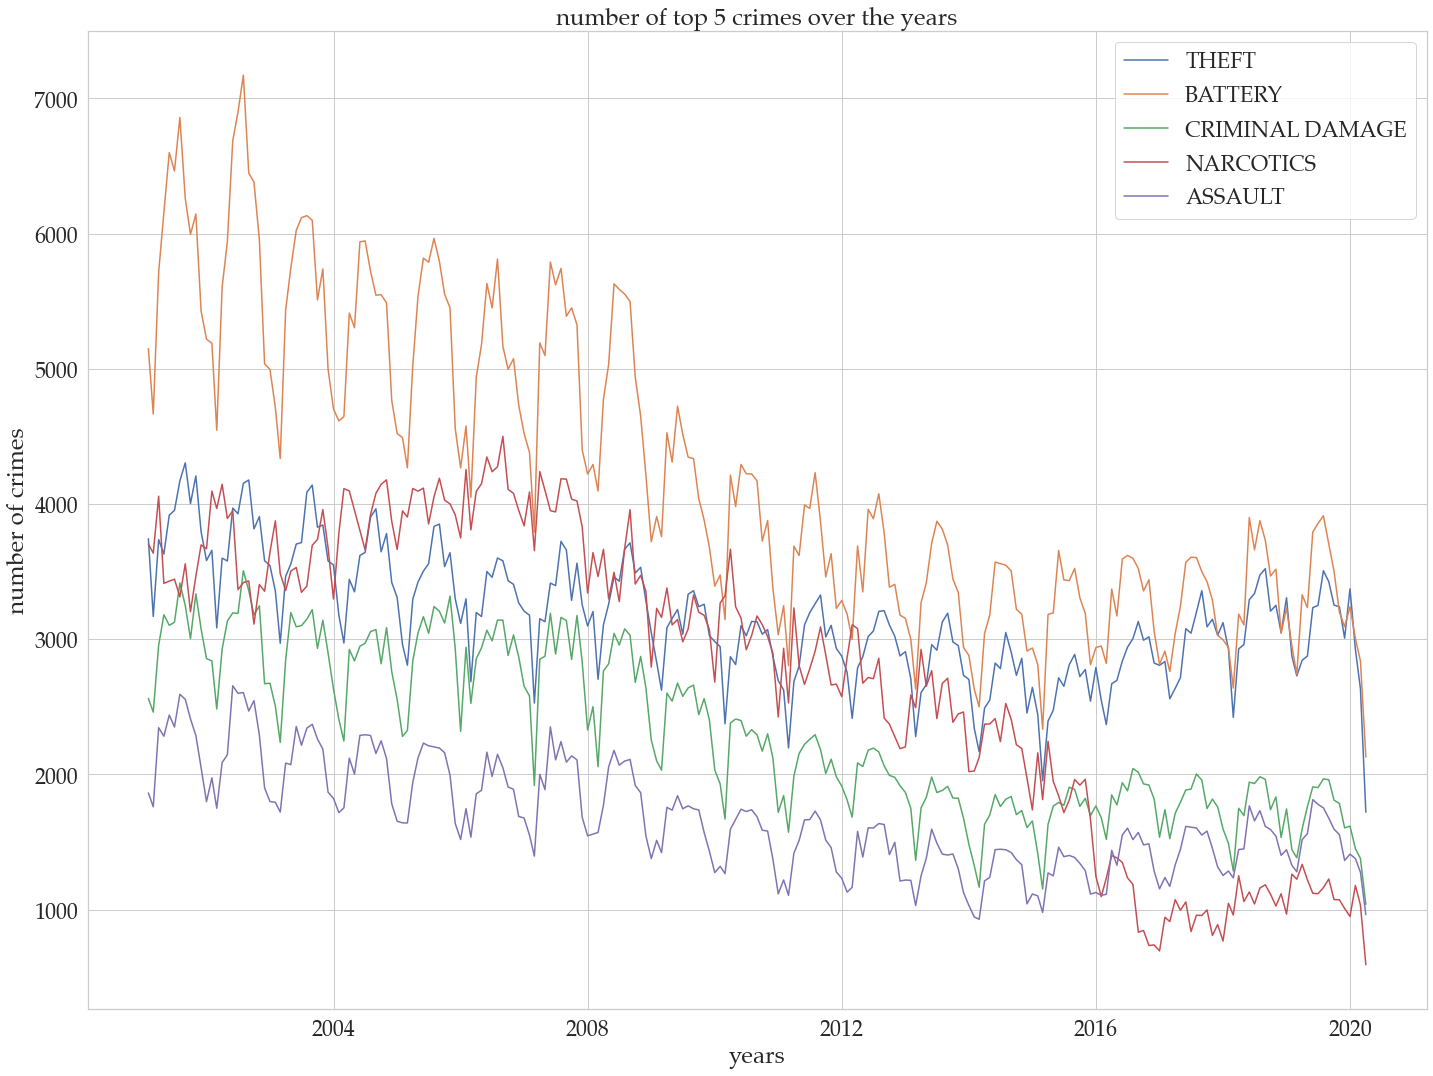

In [46]:
# top 5 crimes throughout the years
fig, ax = plt.subplots(figsize=(24, 18))

for crime in crimes_top_five_total.iloc[:, 0]:
    df_crime = crime_by_date.loc[crime_by_date["Primary Type"] == crime]
    crime_monthly = df_crime.groupby(pd.Grouper(
        key="Date", freq="M")).size()  # group by month
    # crime_from_2018 = crime_monthly.loc[crime_monthly.index >= np.datetime64("2018")] # crimes from 2018 to now
    #crime_monthly.plot.area(label=crime, stacked=False)
    ax.plot(crime_monthly, label=crime)
    ax.set(title="number of top 5 crimes over the years",
           xlabel="years", ylabel="number of crimes")
    ax.legend()

plt.show()

# narcotics has a sharply decline around 2016 compare to other top crimes.
# theft and battery are slowly increasing.

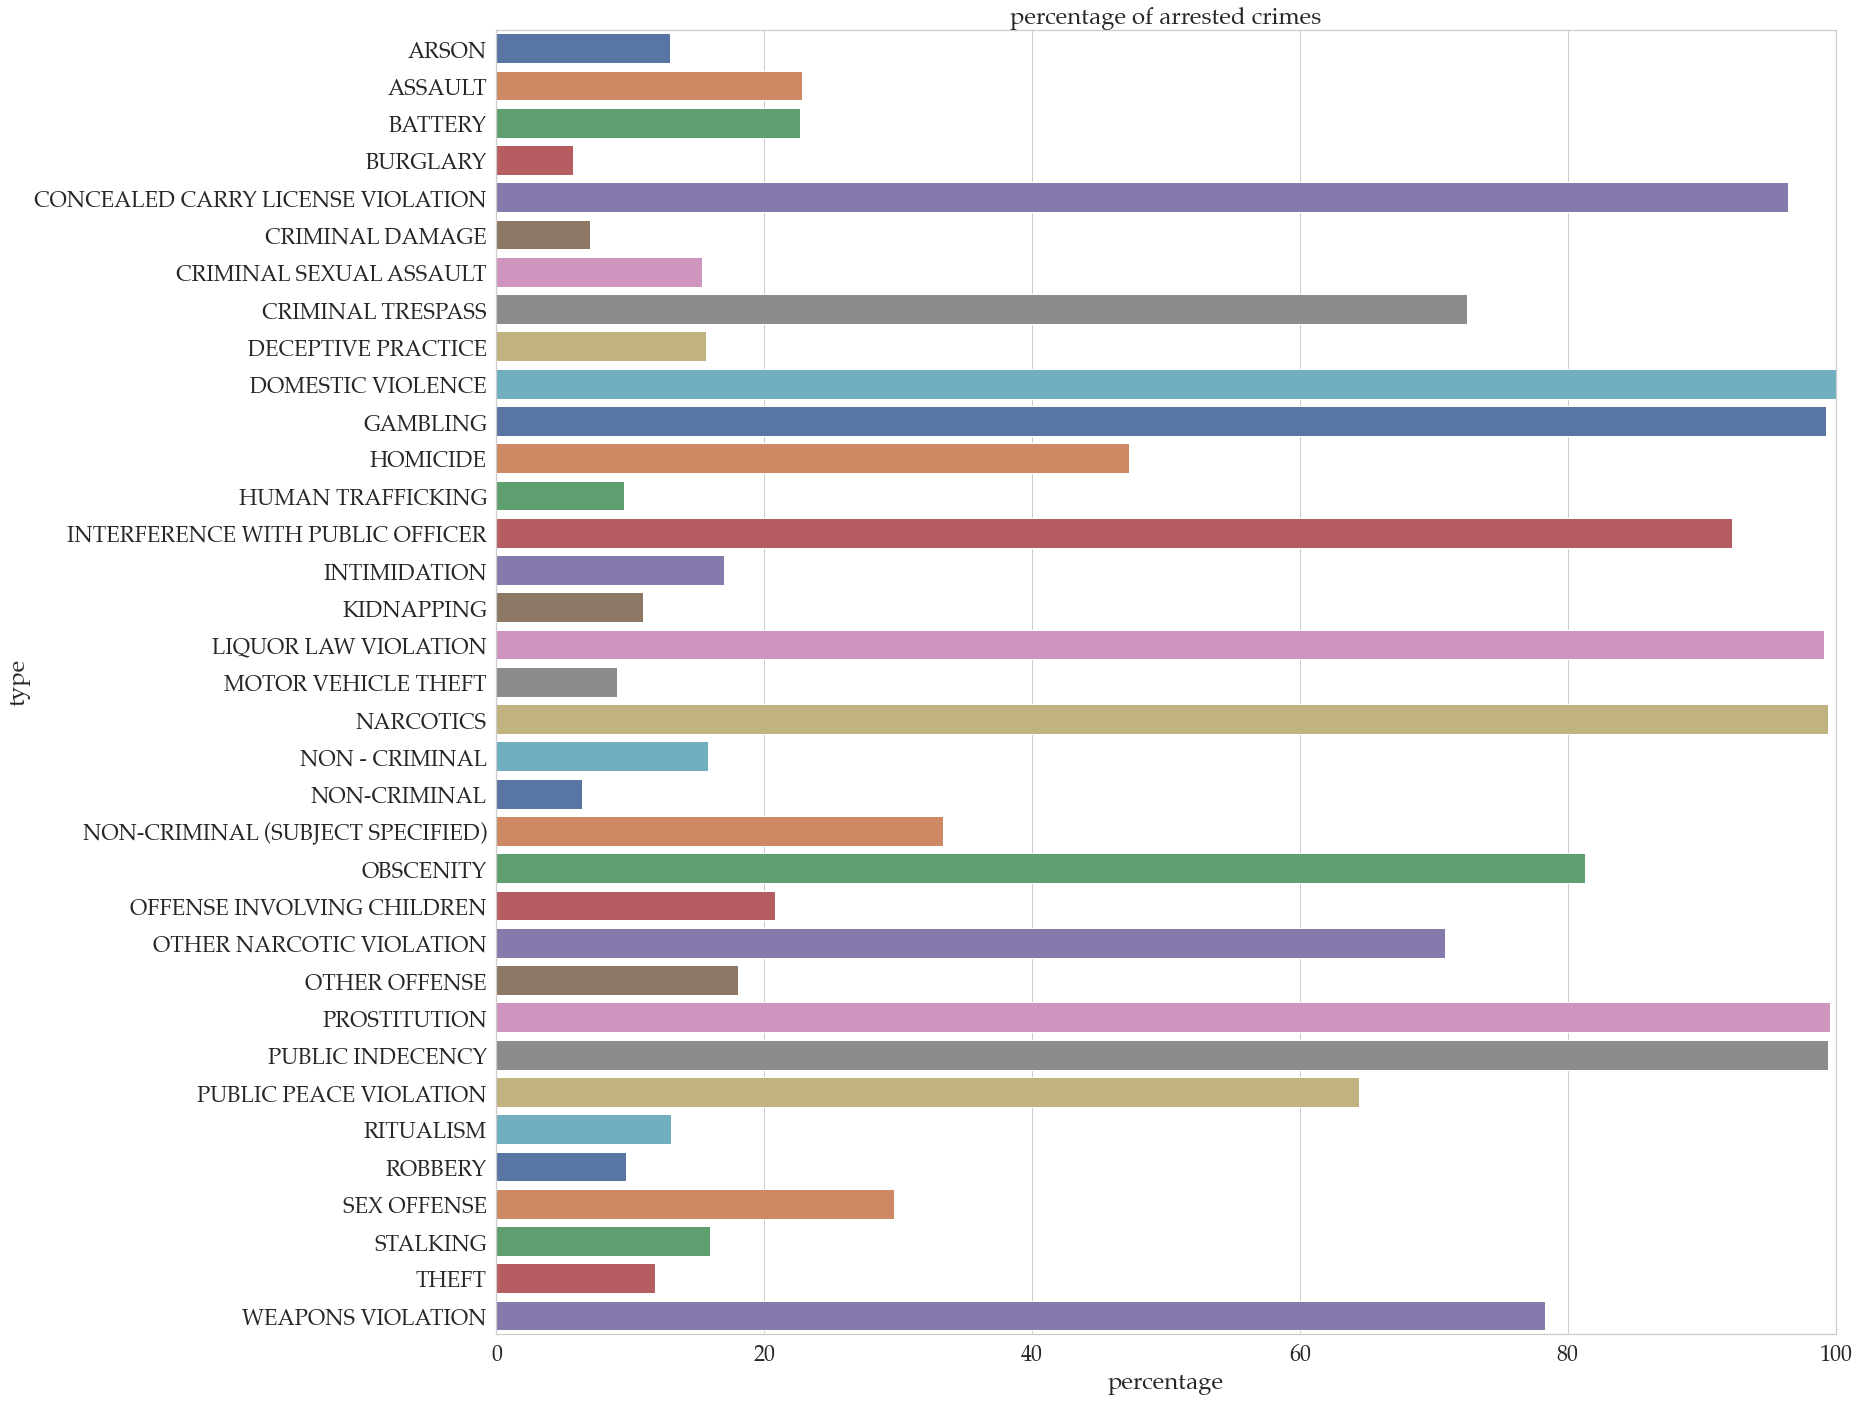

In [47]:
# 4 - relationship between type of the crime and arrest

crime_arrest = df[["Primary Type", "Arrest"]].groupby(
    ["Primary Type", "Arrest"]).size().unstack().fillna(0)
ca_arrested_pct = crime_arrest[1].div(crime_arrest.sum(axis=1)).mul(
    100).reset_index(name="percentage")  # True = 1

# bar plot
fig, ax = plt.subplots(figsize=(24, 24))
sns.barplot(x="percentage", y="Primary Type",
            data=ca_arrested_pct, ax=ax, palette="deep")
ax.set(xlim=(0, 100), title="percentage of arrested crimes",
       xlabel="percentage", ylabel="type")

plt.show()
;

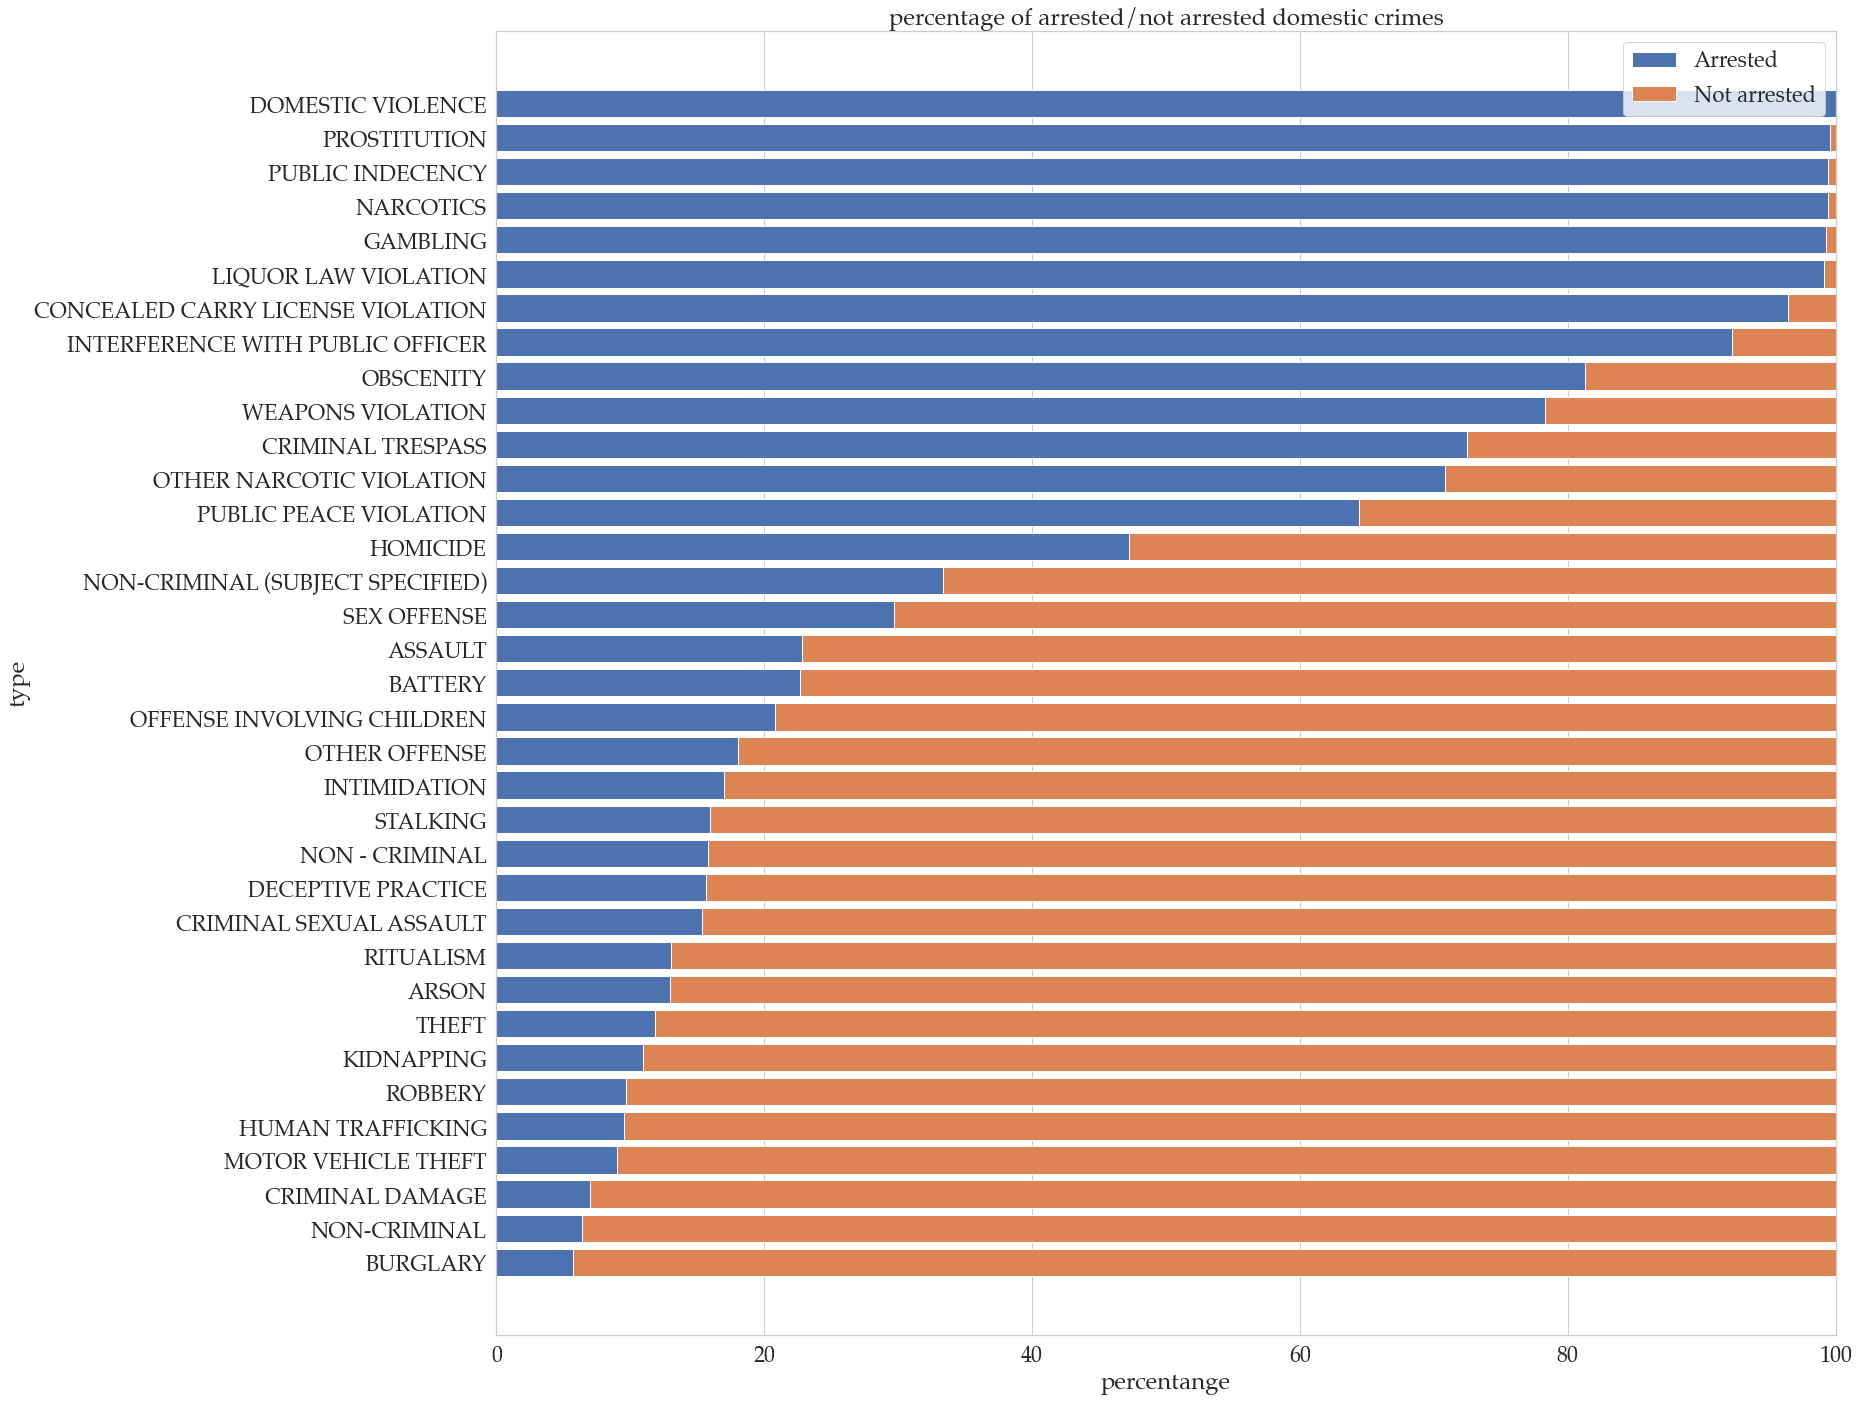

In [48]:
# 100% stacked bar plot
ca_pct = ca_arrested_pct
ca_pct["inv percentage"] = 100 - ca_pct["percentage"]
ca_pct = ca_pct.sort_values(by="inv percentage", ascending=False)
#ca_pct.plot(kind="bar", stacked=True)

fig, ax = plt.subplots(figsize=(24, 24))
ax.barh(y=ca_pct["Primary Type"], width=ca_pct["percentage"], label="Arrested")
ax.barh(y=ca_pct["Primary Type"], width=ca_pct["inv percentage"],
        left=ca_pct["percentage"], label="Not arrested")
ax.set(title="percentage of arrested/not arrested domestic crimes",
       xlabel="percentange", ylabel="type")
ax.legend()

plt.show()
;

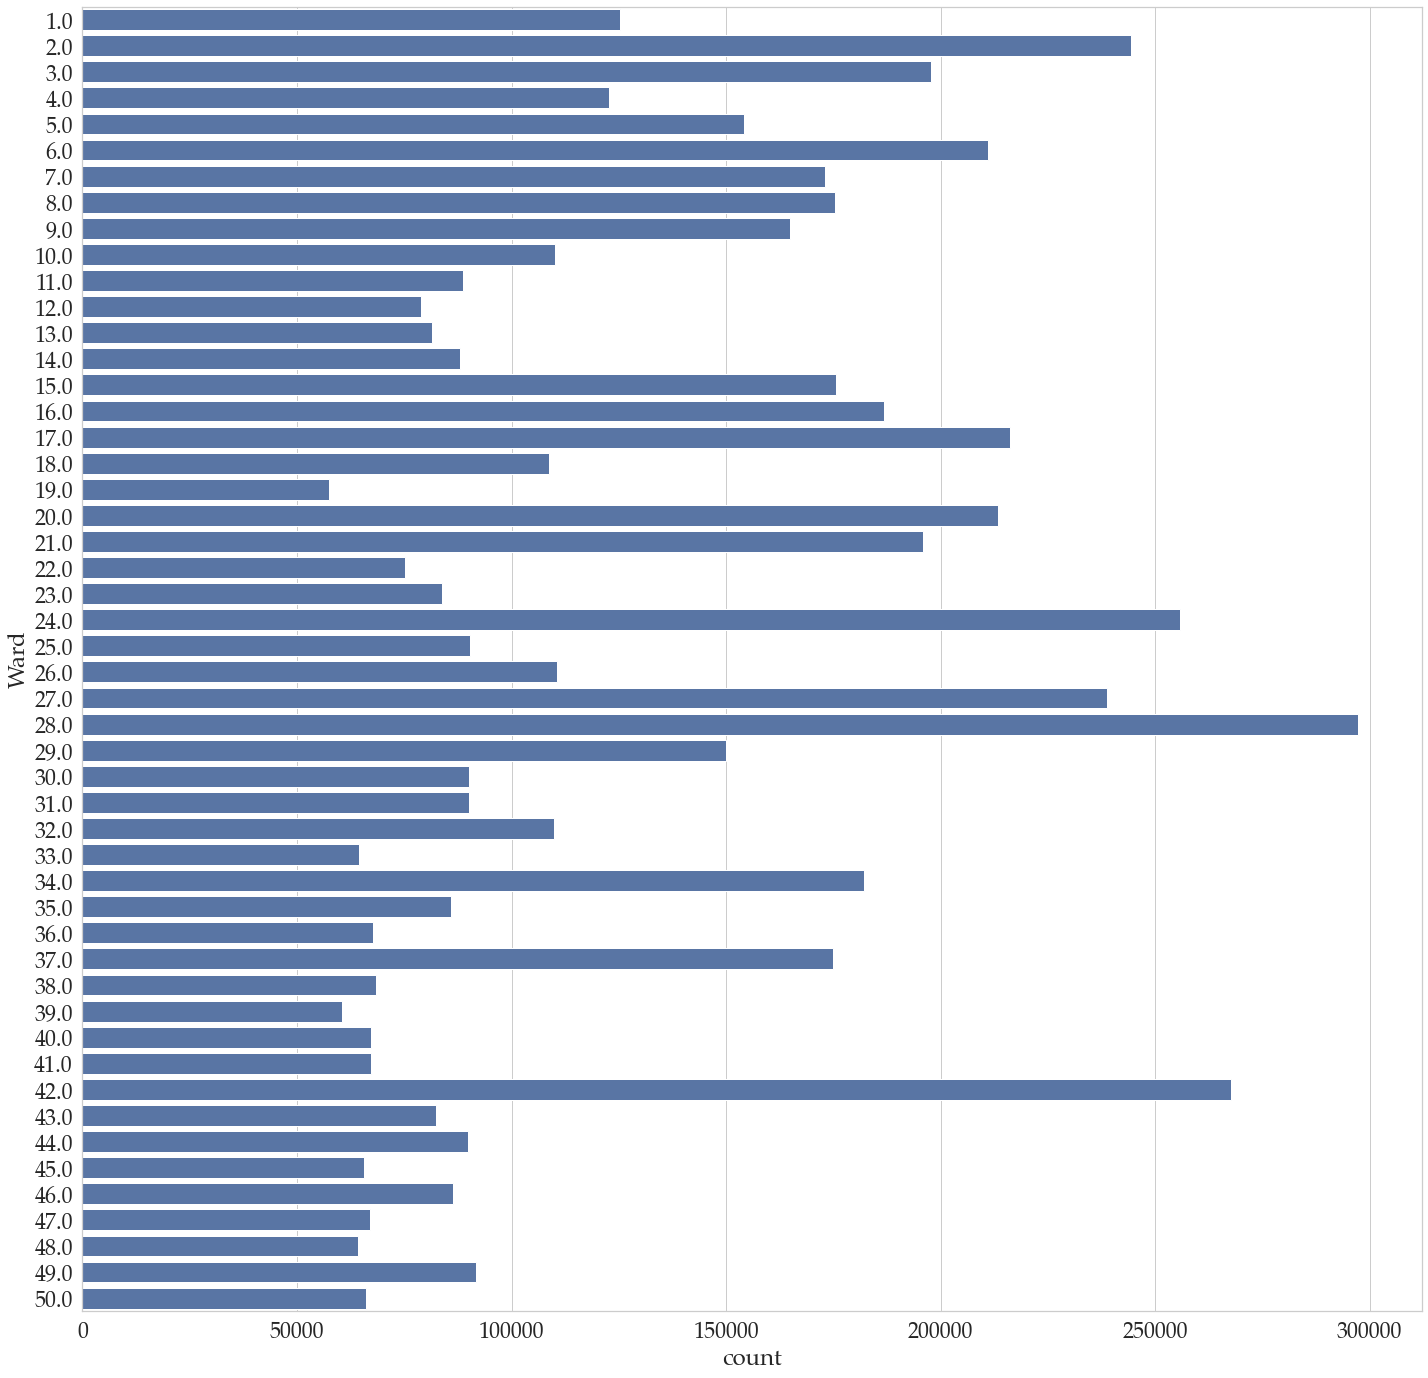

In [49]:
# 5 - locations and crime rate

# 5.1 - using ward as a classifier
crime_ward = df[["Primary Type", "Ward", "Date"]]

# number of crimes correspond to each ward
crime_ward_total = crime_ward.groupby("Ward").size().reset_index(name="count")
plt.figure(figsize=(24, 24))
sns.barplot(x="count", y="Ward", data=crime_ward_total, orient="h", color="b")

plt.show()
;

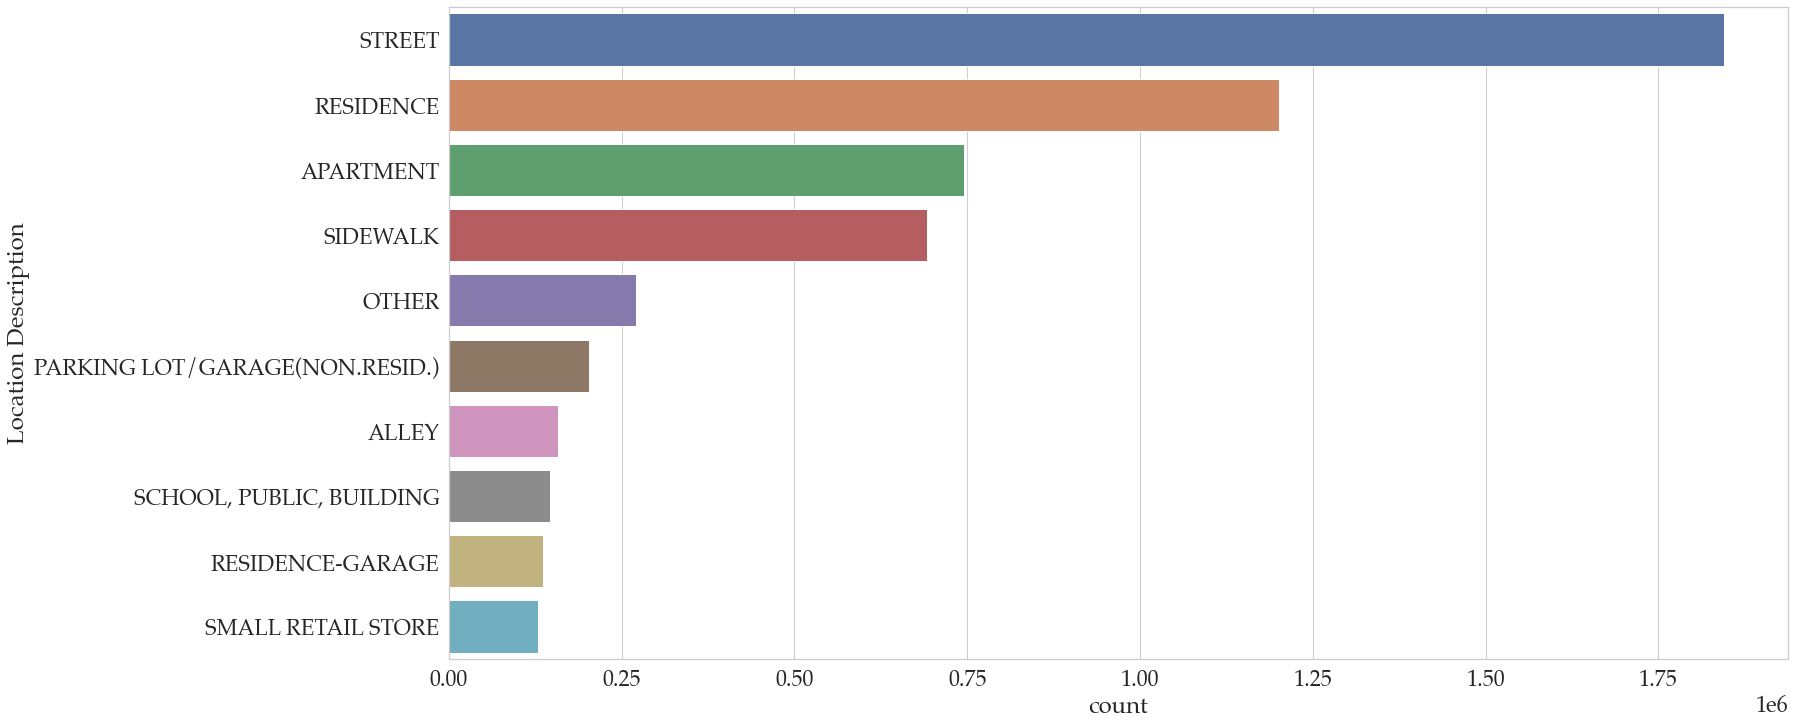

In [50]:
# 5.2 - using location description as a classifier
crime_location = df[["Primary Type", "Location Description", "Date"]]

# number of crimes correspond to each location
crime_location_total = crime_location.groupby("Location Description").size(
).sort_values(ascending=False).reset_index(name="count")

plt.figure(figsize=(24, 12))
sns.barplot(x="count", y="Location Description",
            data=crime_location_total[:10])

plt.show()
;

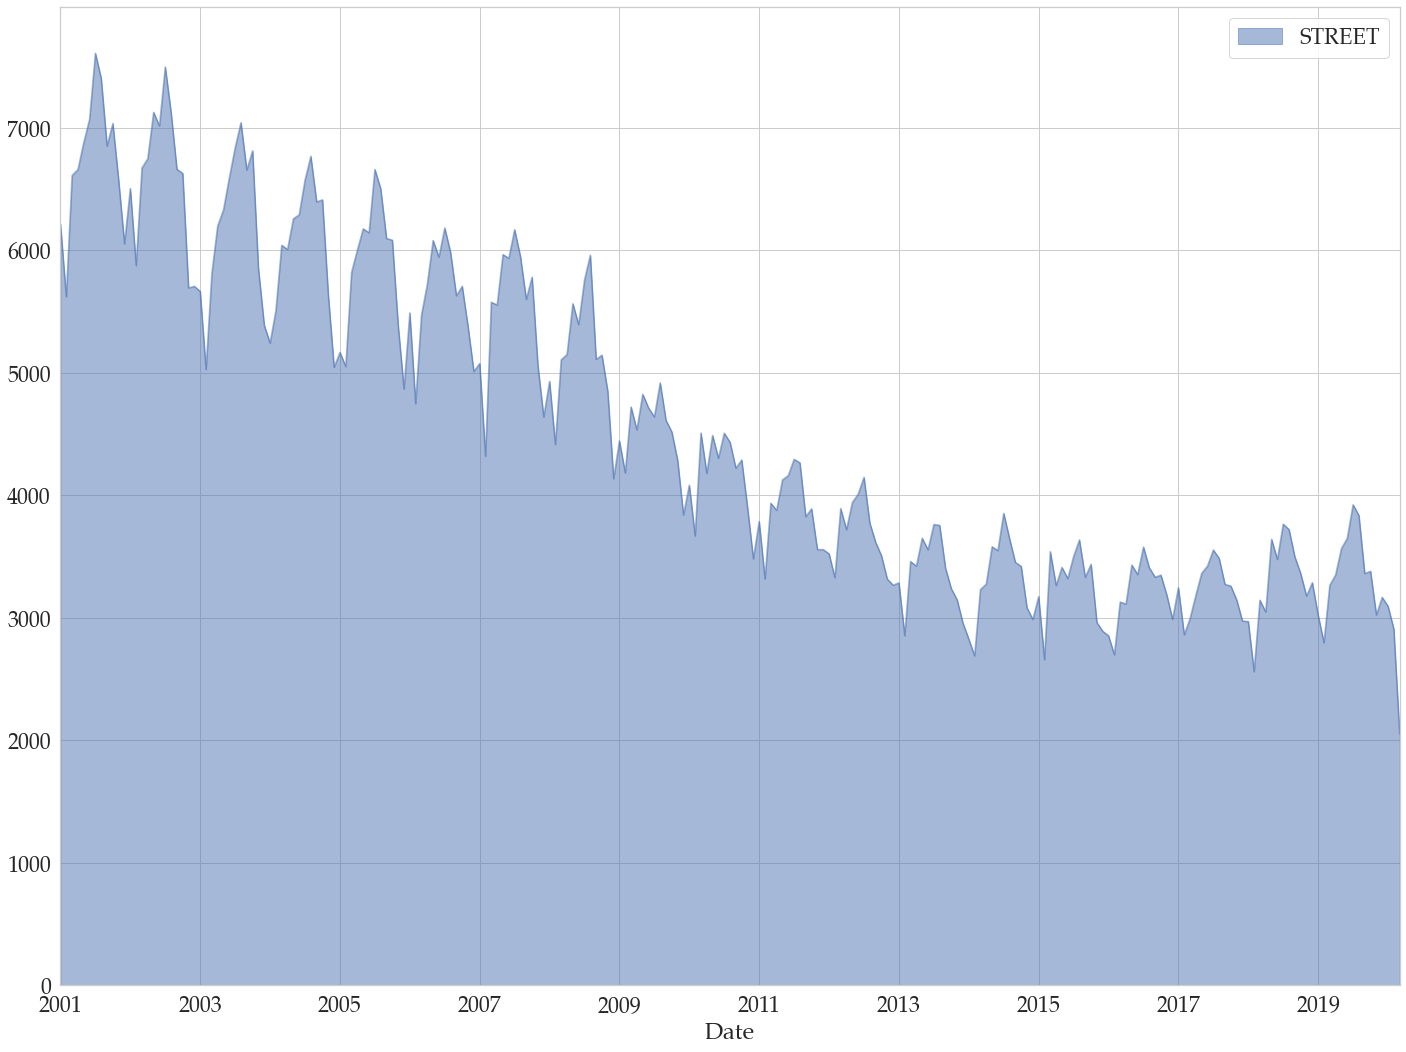

In [51]:
# plot the crimes happened at the STREET throughout the years

cl_date = crime_location.groupby(["Location Description", "Date"]).agg(
    count=("Location Description", "count")).reset_index()
cl_date_street = cl_date.loc[cl_date["Location Description"] == "STREET"].drop(
    columns="Location Description")  # select STREET column
cl_date_street = cl_date_street.groupby(pd.Grouper(
    key="Date", freq="M")).size()  # group by month

cl_date_street.plot.area(stacked=False, alpha=0.5, label="STREET", legend=True)

plt.show()

#f, ax = plt.subplots()
#ax.fill_between(cl_date_street.index, 0, cl_date_street, alpha=0.3)
#ax.plot(cl_date_street, label="STREET")
# ax.legend()

#sns.lineplot(data=cl_date_street, label="STREET")

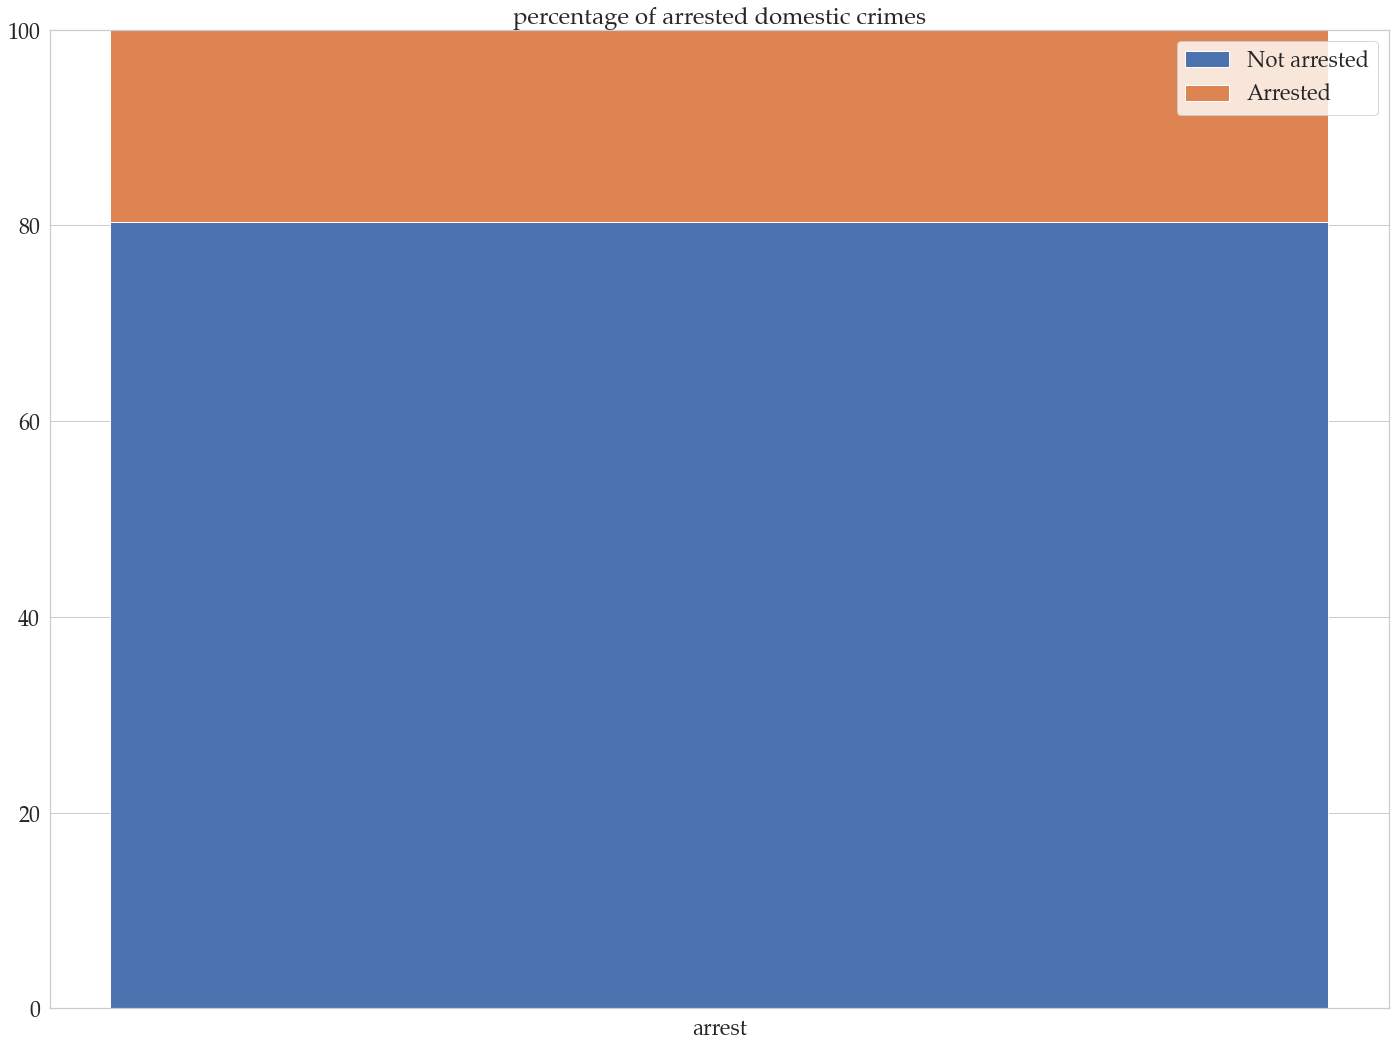

In [52]:
# 6 - perecntage of domestic crimes ended in an arrest

domestic_arrest = df[["Domestic", "Arrest"]].loc[df["Domestic"] == True]
da_pct = domestic_arrest["Arrest"].value_counts(normalize=True).mul(100)

fig, ax = plt.subplots()
ax.bar(x="arrest", height=da_pct[0], label="Not arrested")
ax.bar(x="arrest", height=da_pct[1], bottom=da_pct[0], label="Arrested")
ax.set(ylim=(0, 100), title="percentage of arrested domestic crimes")
ax.legend()

plt.show()

# approximately 80% of domestic crimes are not arrested.

In [53]:
# 7.1 - sexual crimes in each location
sexual_crimes = crime_location.loc[(crime_location["Primary Type"] == "CRIMINAL SEXUAL ASSAULT") | (
    crime_location["Primary Type"] == "SEX OFFENSE")]
sexual_crimes = sexual_crimes.groupby(
    ["Primary Type", "Location Description"]).size().unstack().T.fillna(0)

In [54]:
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html
# https://stackoverflow.com/questions/34035427/conditional-removal-of-labels-in-matplotlib-pie-chart/49753079


def autopct_limit(limit):
    def autopct(pct):
        return ("%.2f" % pct) if pct > limit else ""
    return autopct

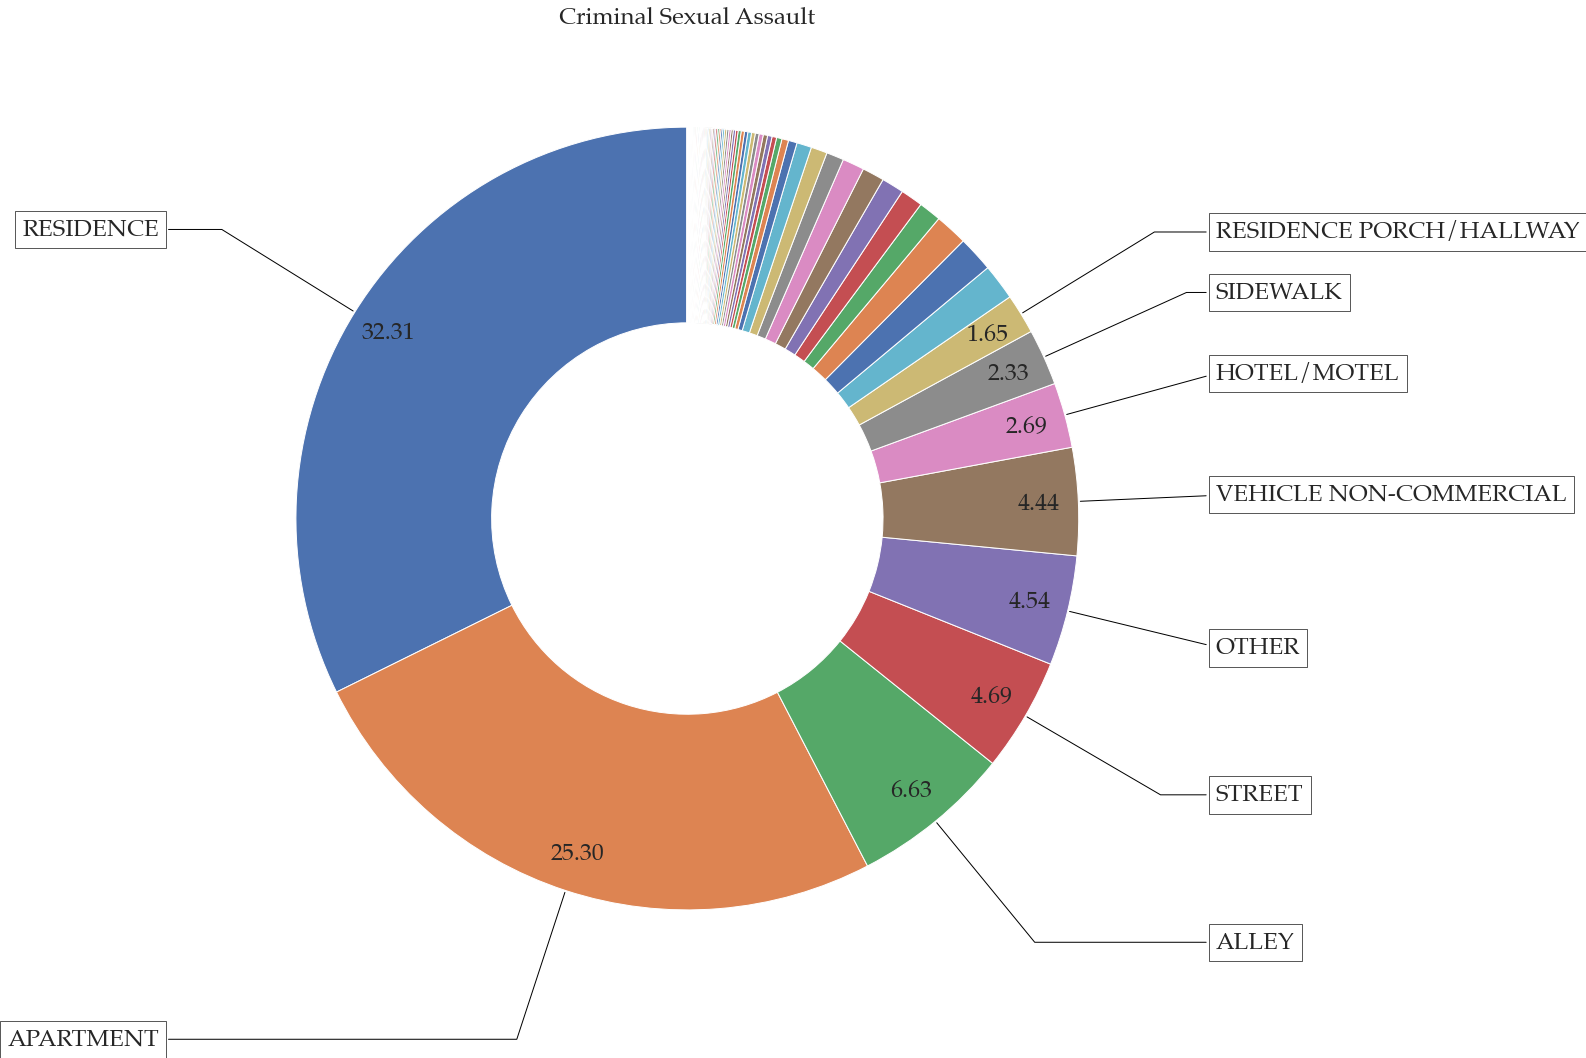

In [55]:
# criminal sexual assault doughnut chart
sexual_crimes = sexual_crimes.sort_values(
    by="CRIMINAL SEXUAL ASSAULT", ascending=False)

fig, ax = plt.subplots(figsize=(18, 18), subplot_kw=dict(aspect="equal"))
wedges, texts, pct = ax.pie(sexual_crimes.iloc[:, 0], wedgeprops=dict(
    width=0.5), autopct=autopct_limit(1.6), pctdistance=0.9, startangle=90)
bbox_props = dict(boxstyle="square, pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-", color="black"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    arc = np.abs(p.theta2 - p.theta1)
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    horizontal_alignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connection_style = "angle, angleA=0, angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connection_style})
    if arc < 5.5:
        continue  # prevent cluttering annotations
    ax.annotate(sexual_crimes.index[i], xy=(x, y), xytext=(
        1.35*np.sign(x), 1.4*y), horizontalalignment=horizontal_alignment, **kw)

ax.set_title("Criminal Sexual Assault")

plt.show()
;

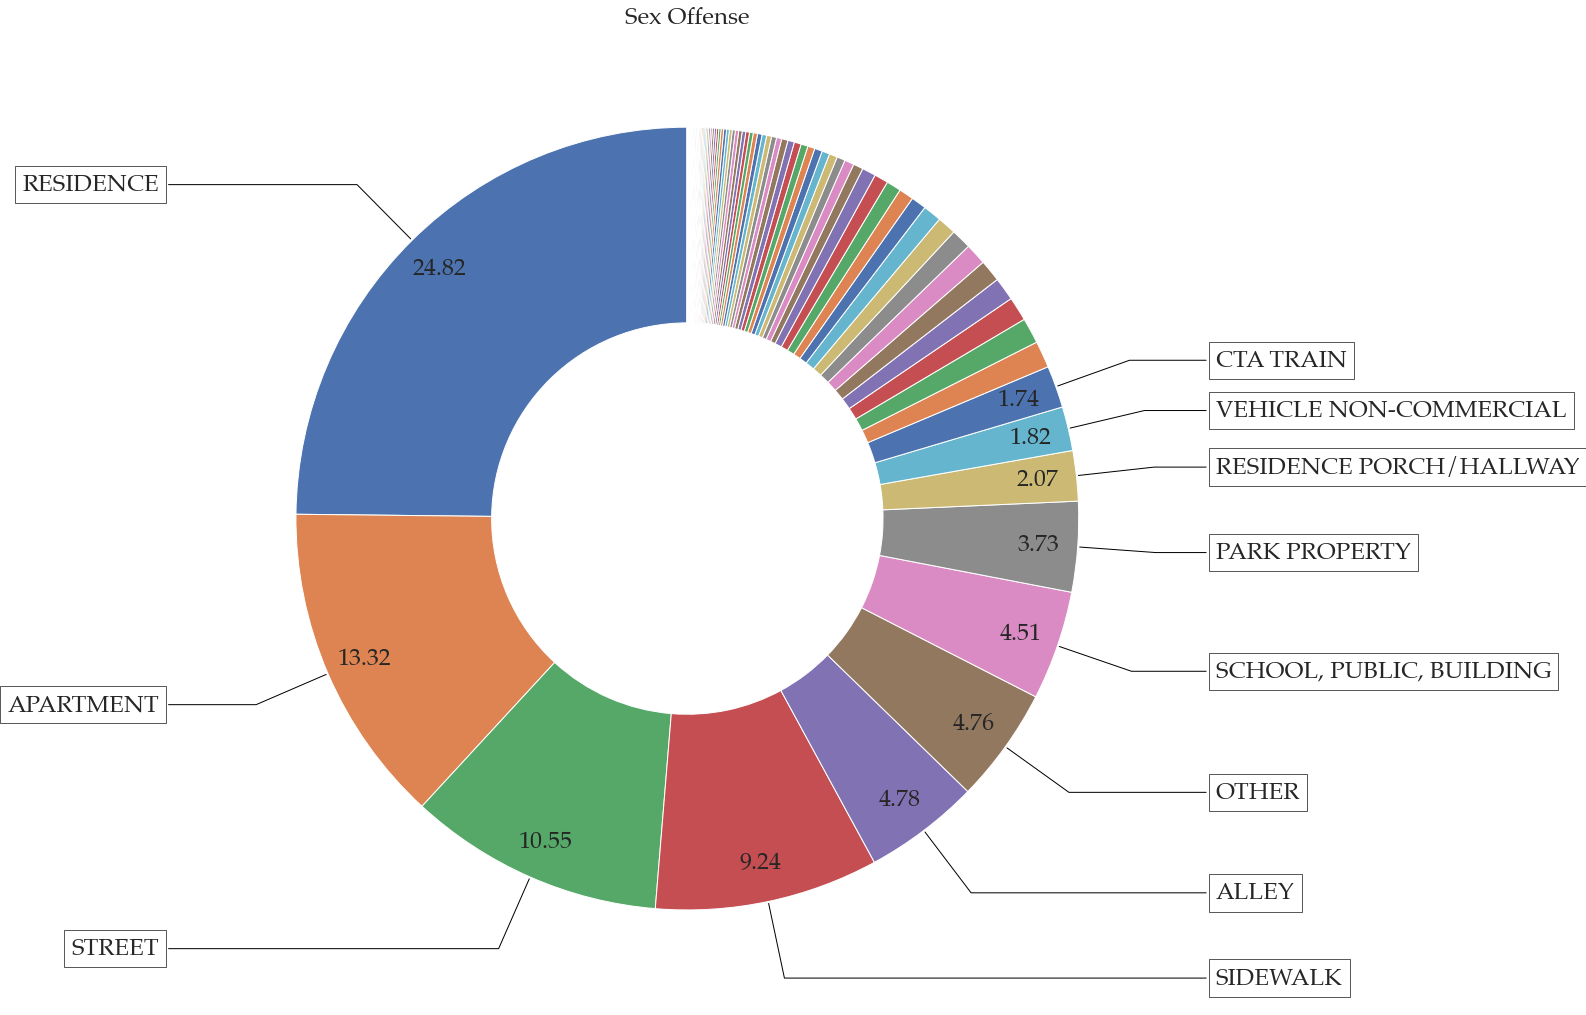

In [56]:
# sex offense doughnut chart
sexual_crimes = sexual_crimes.sort_values(by="SEX OFFENSE", ascending=False)

fig, ax = plt.subplots(figsize=(18, 18))
wedges, texts, pct = ax.pie(sexual_crimes.iloc[:, 1], wedgeprops=dict(
    width=0.5), autopct=autopct_limit(1.7), pctdistance=0.9, startangle=90)
bbox_props = dict(boxstyle="square, pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-", color="black"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    arc = np.abs(p.theta2 - p.theta1)
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    horizontal_alignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connection_style = "angle, angleA=0, angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connection_style})
    if arc < 5.3:
        continue  # prevent cluttering annotations
    ax.annotate(sexual_crimes.index[i], xy=(x, y), xytext=(
        1.35*np.sign(x), 1.2*y), horizontalalignment=horizontal_alignment, **kw)

ax.set_title("Sex Offense")

plt.show()

# both sexual offenses have a high number of cases at indoor environments like residence, apartment and outdoor environments like on the street, sidewalk, alley.

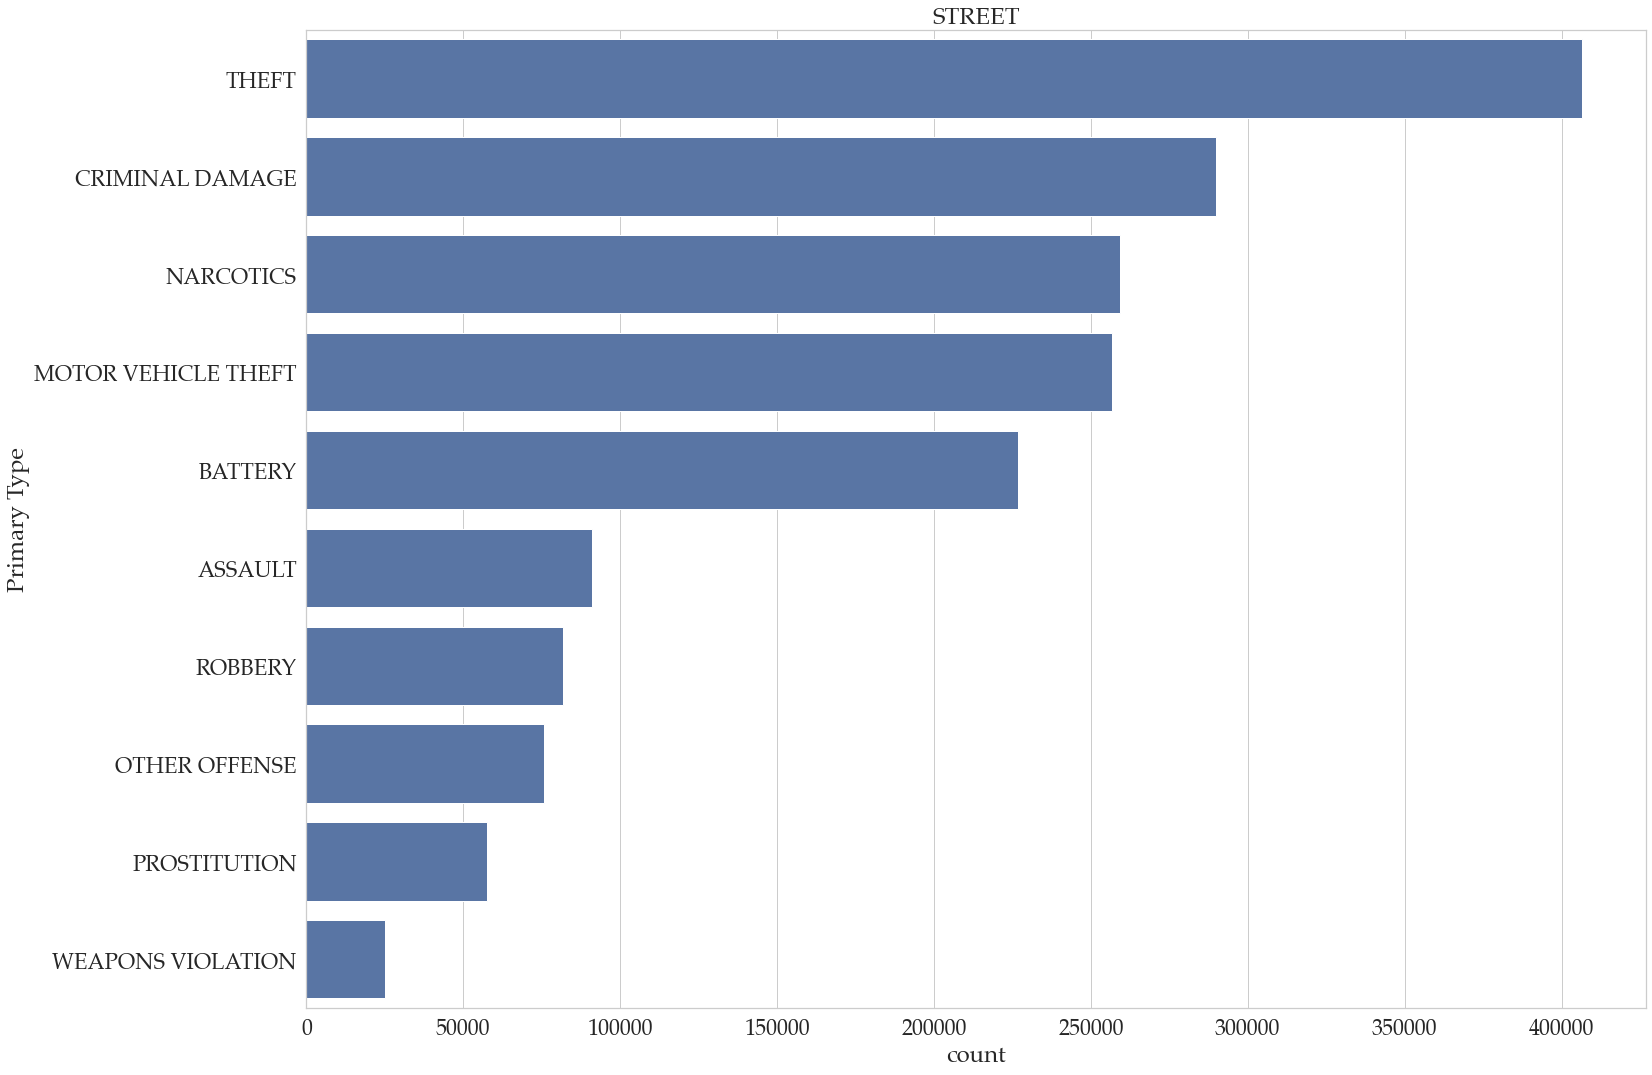

In [57]:
# 7.2 - what type of crimes usually happen at STREET or RESIDENCE or APARTMENT?

# STREET
cl_type = crime_location.groupby(["Location Description", "Primary Type"]).agg(
    count=("Location Description", "count")).reset_index()
cl_type_street = cl_type.loc[cl_type["Location Description"] == "STREET"].drop(
    columns="Location Description")
cl_type_street = cl_type_street.sort_values(by="count", ascending=False)
ax = sns.barplot(x="count", y="Primary Type",
                 data=cl_type_street[:10], color="b")
ax.set_title("STREET")
plt.show()
;

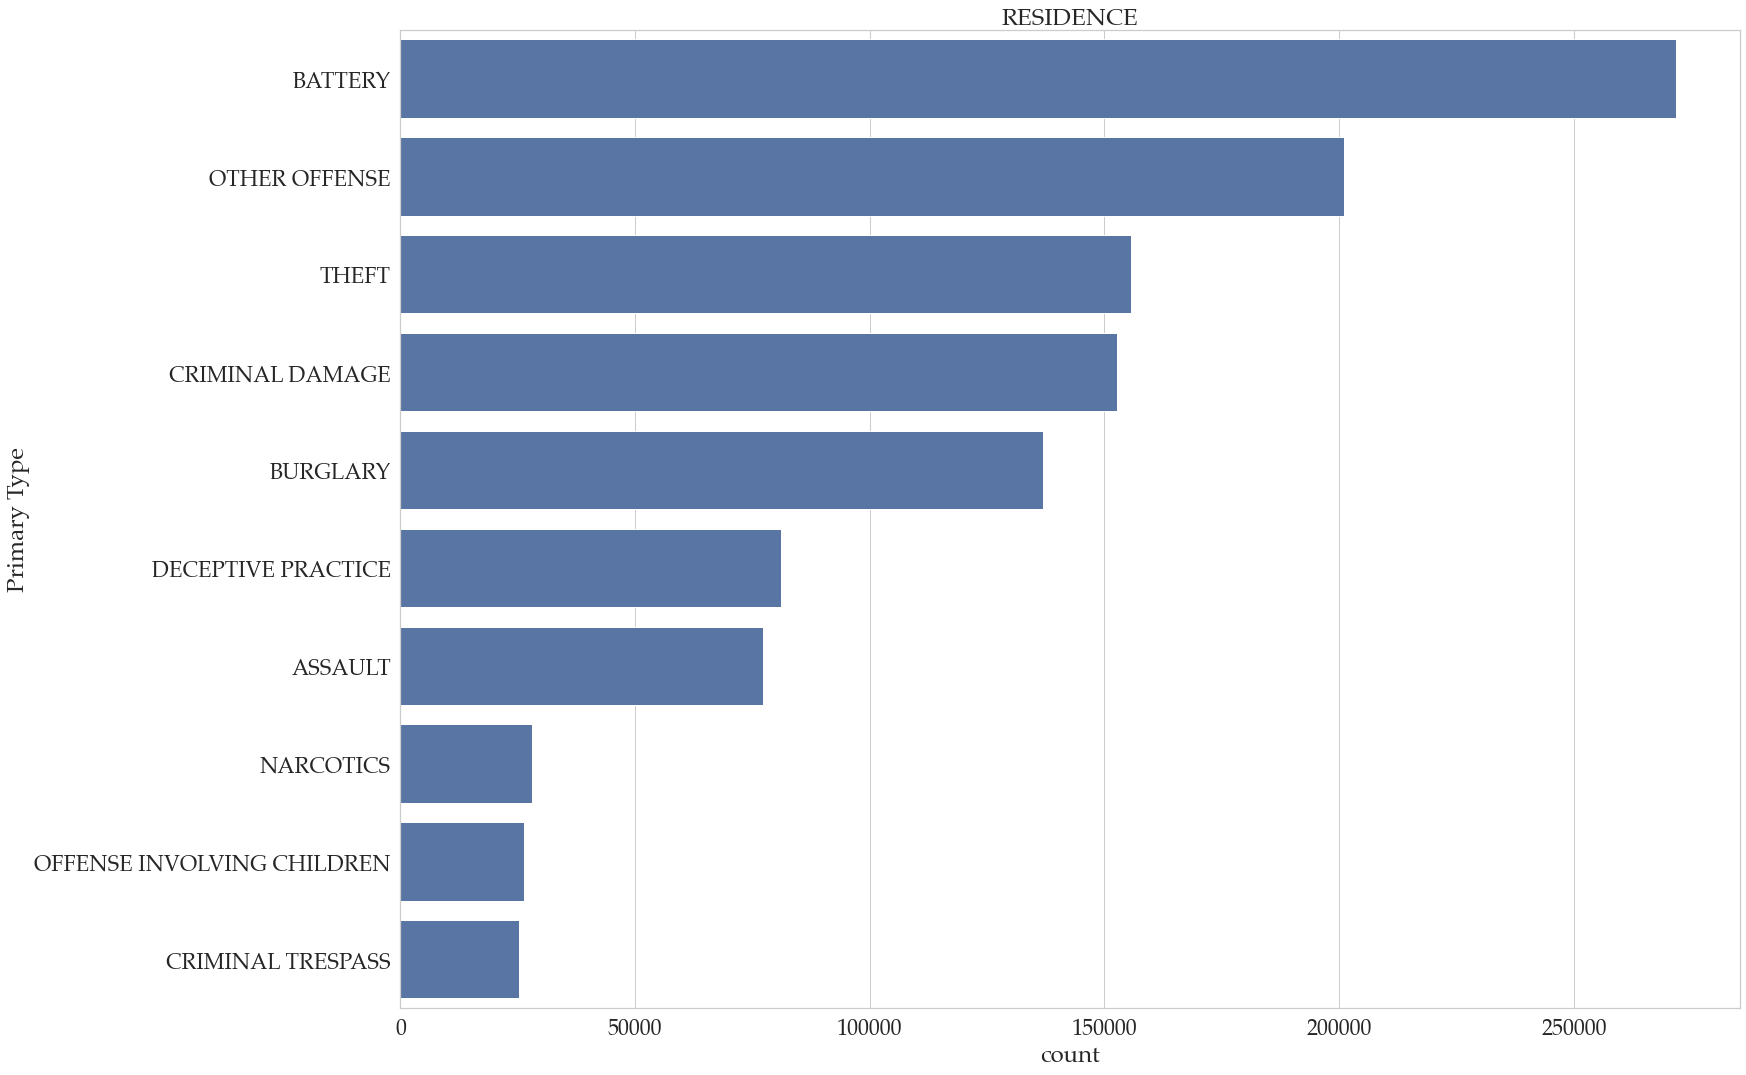

In [58]:
# RESIDENCE
cl_type = crime_location.groupby(["Location Description", "Primary Type"]).agg(
    count=("Location Description", "count")).reset_index()
cl_type_street = cl_type.loc[cl_type["Location Description"] == "RESIDENCE"].drop(
    columns="Location Description")
cl_type_street = cl_type_street.sort_values(by="count", ascending=False)
ax = sns.barplot(x="count", y="Primary Type",
                 data=cl_type_street[:10], color="b")
ax.set_title("RESIDENCE")
plt.show()
;

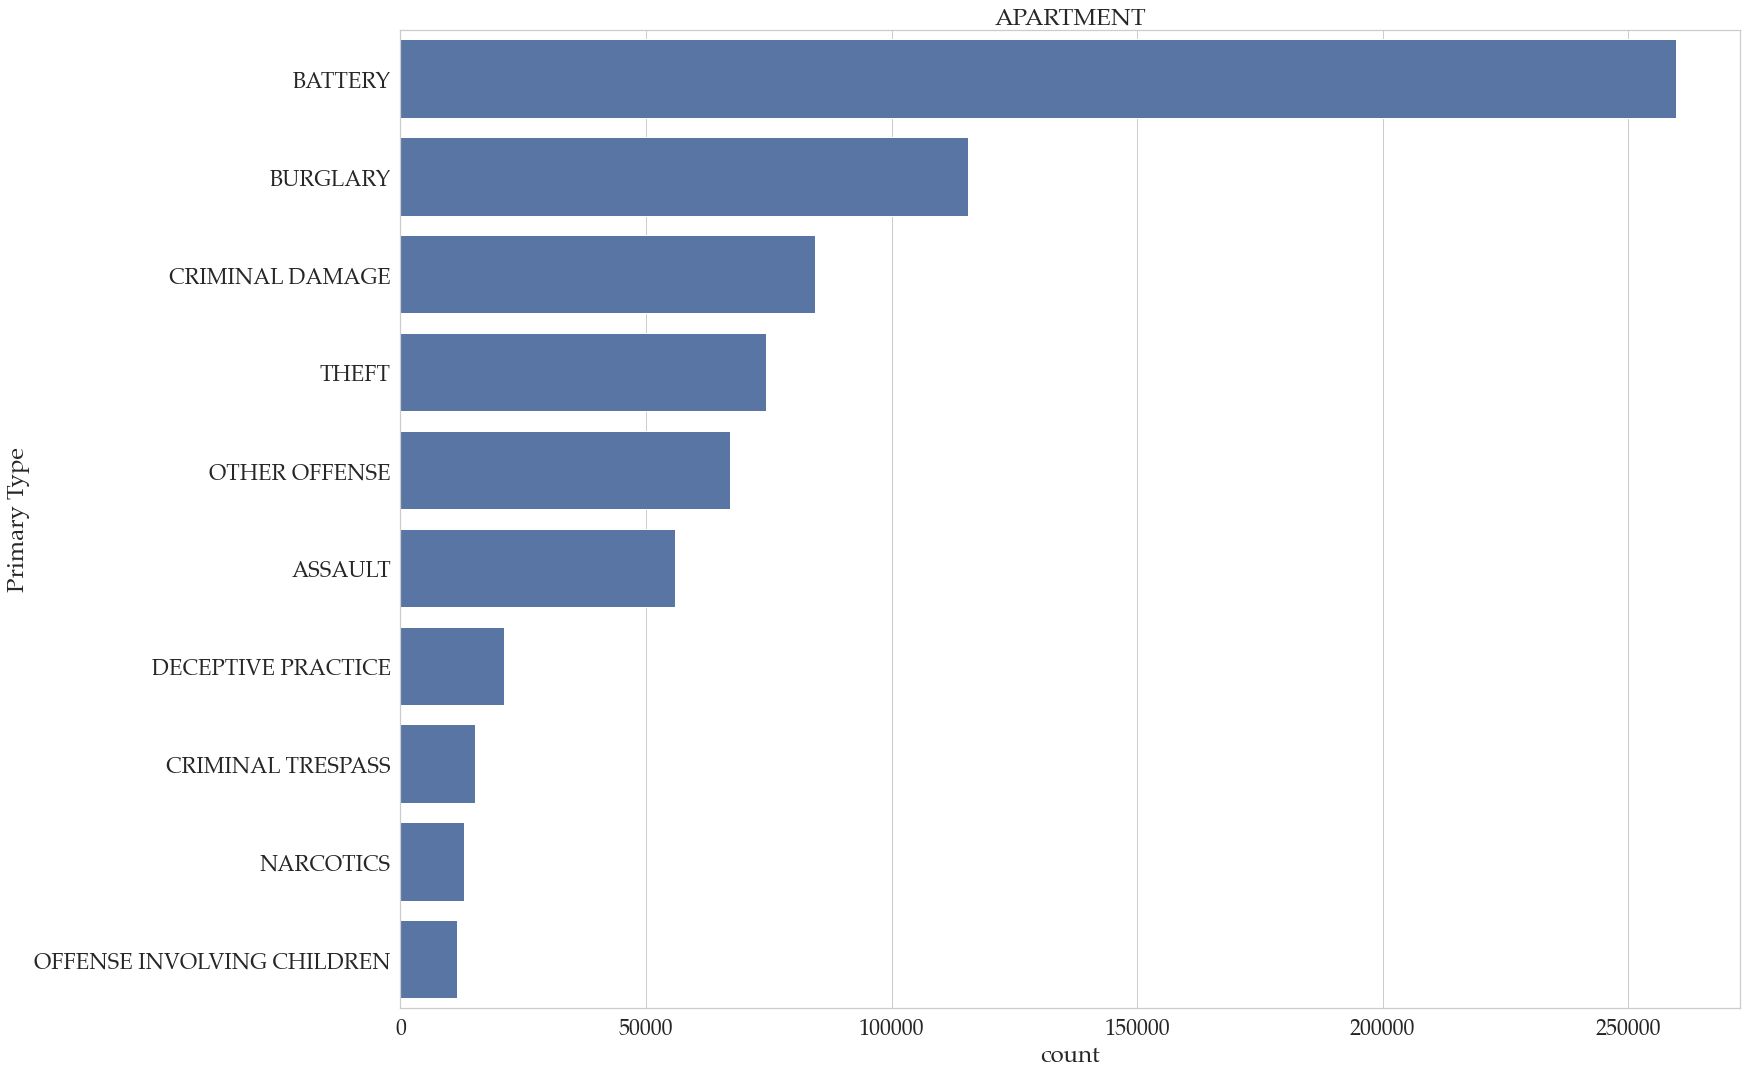

In [59]:
# APARTMENT
cl_type = crime_location.groupby(["Location Description", "Primary Type"]).agg(
    count=("Location Description", "count")).reset_index()
cl_type_street = cl_type.loc[cl_type["Location Description"] == "APARTMENT"].drop(
    columns="Location Description")
cl_type_street = cl_type_street.sort_values(by="count", ascending=False)
ax = sns.barplot(x="count", y="Primary Type",
                 data=cl_type_street[:10], color="b")
ax.set_title("APARTMENT")
plt.show()
;